In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('D:\\빅데이터분석과정\\H백화점고객성별예측\\train.csv', encoding='cp949')
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [3]:
test = pd.read_csv('D:\\빅데이터분석과정\\H백화점고객성별예측\\test.csv', encoding='cp949')
test.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [4]:
trainc = train.copy()

In [5]:
testc = test.copy()

In [6]:
trainc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [7]:
trainc.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [8]:
testc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    4052 non-null   float64
 10  겨울_구매건수    4089 non-null   float64
 11  봄_구매건수     4319 non-null   float64
 12  여름_구매건수    4009 non-null   float64
 13  아침_구매건수    3608 non-null   float64
 14  저녁_구매건수    3975 non-null   float64
 15  점심_구매건수    4861 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [9]:
testc.isnull().sum()

custid          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       948
겨울_구매건수       911
봄_구매건수        681
여름_구매건수       991
아침_구매건수      1392
저녁_구매건수      1025
점심_구매건수       139
주구매코너           0
dtype: int64

In [10]:
##### 결측치 0으로 대체

##### 평균값 또는 최빈값으로 대체하면 [봄, 여름, 가을, 겨울]의 구매건수의 합과
##### [아침, 점심, 저녁]의 구매건수의 합이 맞지 않아서 데이터의 수치가 맞지 않게 됨

In [11]:
col = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수',
       '아침_구매건수','저녁_구매건수','점심_구매건수']

In [12]:
trainc[col] = trainc[col].fillna(0)
trainc[col]

,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
0,0.0,9.0,6.0,0.0,0.0,6.0,9.0
1,0.0,5.0,4.0,0.0,3.0,0.0,6.0
2,7.0,17.0,12.0,0.0,10.0,11.0,15.0
3,5.0,8.0,15.0,0.0,0.0,18.0,10.0
4,0.0,0.0,5.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...
4995,13.0,33.0,14.0,33.0,8.0,41.0,44.0
4996,4.0,6.0,6.0,1.0,3.0,0.0,14.0
4997,12.0,6.0,6.0,13.0,16.0,0.0,21.0
4998,6.0,4.0,2.0,1.0,0.0,2.0,11.0


In [13]:
trainc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [14]:
testc[col] = test[col].fillna(0)
testc[col]

,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
0,5.0,4.0,7.0,9.0,13.0,1.0,11.0
1,13.0,8.0,10.0,8.0,4.0,10.0,25.0
2,6.0,7.0,3.0,6.0,3.0,1.0,18.0
3,5.0,15.0,9.0,17.0,0.0,4.0,42.0
4,18.0,0.0,5.0,3.0,0.0,0.0,26.0
...,...,...,...,...,...,...,...
4995,1.0,2.0,2.0,0.0,1.0,1.0,3.0
4996,0.0,5.0,1.0,7.0,0.0,3.0,10.0
4997,4.0,1.0,6.0,1.0,0.0,0.0,12.0
4998,0.0,7.0,4.0,3.0,2.0,4.0,8.0


In [15]:
testc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [16]:
trainc_testc_data = [trainc, testc]
trainc_testc_data

[      custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  \
 0         18       0   680100    15   45340      1.7        9    10   
 1         21       0   353450     9   39272      1.2        6     8   
 2         23       0  5671400    36  157539      2.8       22    16   
 3         26       0  1964000    28   70143      1.4       15    14   
 4         35       0   885000     5  177000      6.0        5     2   
 ...      ...     ...      ...   ...     ...      ...      ...   ...   
 4995   49952       1  6666517    93   71683      1.8       27    39   
 4996   49954       0  3112100    17  183065      3.6       10    13   
 4997   49957       1  5852482    37  158175      2.6       14    21   
 4998   49975       1   654498    13   50346      2.5       10     7   
 4999   49993       1  2554723    32   79835      1.7        9    26   
 
       수입상품_구매비율  주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  \
 0          26.7   100.0      0.0      9.0     6.0   

In [17]:
trainc.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,9.0,6.0,0.0,0.0,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,0.0,5.0,4.0,0.0,3.0,0.0,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,0.0,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,0.0,0.0,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,피혁A


In [18]:
trainc['내점당평균구매수'] = trainc['구매건수']/trainc['내점일수']
trainc['하루평균구매액'] = trainc['총구매액']/trainc['내점일수']

In [19]:
testc['내점당평균구매수'] = testc['구매건수']/testc['내점일수']
testc['하루평균구매액'] = testc['총구매액']/testc['내점일수']

In [20]:
trainc['수입상품구매액'] = trainc['총구매액']*(trainc['수입상품_구매비율']/100)
testc['수입상품구매액'] = testc['총구매액']*(testc['수입상품_구매비율']/100)

In [21]:
trainc['주말방문사용액'] = trainc['총구매액']*(train['주말방문비율']/100)
testc['주말방문사용액'] = testc['총구매액']*(testc['주말방문비율']/100)

In [22]:
trainc['평일방문사용액'] = trainc['총구매액'] - (trainc['총구매액']*(train['주말방문비율']/100))
testc['평일방문사용액'] = testc['총구매액'] - (testc['총구매액']*(testc['주말방문비율']/100))

In [23]:
trainc['봄_구매비율'] = trainc['봄_구매건수']/trainc['구매건수']
testc['봄_구매비율'] = testc['봄_구매건수']/testc['구매건수']

In [24]:
trainc['여름_구매비율'] = trainc['여름_구매건수']/trainc['구매건수']
testc['여름_구매비율'] = testc['여름_구매건수']/testc['구매건수']

In [25]:
trainc['가을_구매비율'] = trainc['가을_구매건수']/trainc['구매건수']
testc['가을_구매비율'] = testc['가을_구매건수']/testc['구매건수']

In [26]:
trainc['겨울_구매비율'] = trainc['겨울_구매건수']/trainc['구매건수']
testc['겨울_구매비율'] = testc['겨울_구매건수']/testc['구매건수']

In [27]:
trainc['아침_구매비율'] = trainc['아침_구매건수']/trainc['구매건수']
testc['아침_구매비율'] = testc['아침_구매건수']/testc['구매건수']

In [28]:
trainc['점심_구매비율'] = trainc['점심_구매건수']/trainc['구매건수']
testc['점심_구매비율'] = testc['점심_구매건수']/testc['구매건수']

In [29]:
trainc['저녁_구매비율'] = trainc['저녁_구매건수']/trainc['구매건수']
testc['저녁_구매비율'] = testc['저녁_구매건수']/testc['구매건수']

In [30]:
trainc['브랜드구매비율'] = trainc['구매브랜드종류']/trainc['구매건수']
testc['브랜드구매비율'] = testc['구매브랜드종류']/testc['구매건수']

In [31]:
trainc.head(2)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주말방문사용액,평일방문사용액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율,브랜드구매비율
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,680100.00,0.00,0.400000,0.0,0.0,0.600000,0.000000,0.600000,0.4,0.600000
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,132543.75,220906.25,0.444444,0.0,0.0,0.555556,0.333333,0.666667,0.0,0.666667


In [32]:
testc.head(2)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,주말방문사용액,평일방문사용액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율,브랜드구매비율
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,...,1072968.00,2366032.00,0.28000,0.360000,0.200000,0.160000,0.520000,0.440000,0.04000,0.760000
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,...,429129.63,1643960.37,0.25641,0.205128,0.333333,0.205128,0.102564,0.641026,0.25641,0.461538


In [33]:
for dataset in trainc_testc_data:
    
    dataset['주구매코너'] = dataset['주구매코너'].astype('category')
    dataset['주구매코너'] = dataset['주구매코너'].cat.codes

In [34]:
trainc['주구매코너'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: 주구매코너, dtype: int64

In [35]:
testc['주구매코너'].value_counts()

14    1293
24    1191
12     416
13     415
9      302
11     246
19     193
8      125
3      114
7       90
16      87
21      83
15      76
10      66
23      61
22      61
6       43
5       41
17      37
18      14
1       12
2       10
20      10
4       10
0        4
Name: 주구매코너, dtype: int64

In [36]:
corr = trainc.corr()
corr.gender.sort_values(ascending=False)

gender       1.000000
custid       0.262472
아침_구매건수      0.127779
아침_구매비율      0.122799
여름_구매건수      0.101900
총구매액         0.099137
점심_구매건수      0.097237
주말방문사용액      0.094995
구매건수         0.094022
평일방문사용액      0.092398
가을_구매건수      0.088600
내점일수         0.084255
구매브랜드종류      0.083988
봄_구매건수       0.076116
평균구매가격       0.072181
하루평균구매액      0.071588
수입상품구매액      0.065523
겨울_구매건수      0.065261
내점당평균구매수     0.049110
여름_구매비율      0.037274
점심_구매비율      0.025877
주말방문비율       0.020457
가을_구매비율      0.018709
겨울_구매비율     -0.018400
평균할부개월수     -0.020066
수입상품_구매비율   -0.021294
저녁_구매건수     -0.021618
봄_구매비율      -0.034863
주구매코너       -0.039270
브랜드구매비율     -0.067914
저녁_구매비율     -0.129500
Name: gender, dtype: float64

In [37]:
##### get_dummies를 사용하여 '주구매코너'의 feature들의 관계성을 끊어준다

In [38]:
trainc = pd.get_dummies(trainc, columns=['주구매코너'])
trainc

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


In [39]:
testc = pd.get_dummies(testc, columns=['주구매코너'])
testc

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,...,1,0,0,0,0,0,0,0,0,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,...,0,0,0,0,0,0,0,0,0,0
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,...,0,0,0,0,0,0,0,0,0,0
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,104996,670690,5,134138,1.4,5,4,0.0,75.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4996,104997,628700,13,48362,1.8,10,7,7.7,42.9,0.0,...,0,0,1,0,0,0,0,0,0,0
4997,104998,960923,12,80077,1.8,7,7,0.0,42.9,4.0,...,0,0,0,0,0,0,0,0,0,0
4998,104999,786600,14,56186,1.7,12,9,14.3,55.6,0.0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
##### 목적값(target value)과의 상관관계 확인

In [41]:
corr = trainc.corr()
corr.gender.sort_values(ascending=False)

gender       1.000000
custid       0.262472
아침_구매건수      0.127779
아침_구매비율      0.122799
여름_구매건수      0.101900
총구매액         0.099137
점심_구매건수      0.097237
주말방문사용액      0.094995
구매건수         0.094022
평일방문사용액      0.092398
가을_구매건수      0.088600
내점일수         0.084255
구매브랜드종류      0.083988
봄_구매건수       0.076116
평균구매가격       0.072181
하루평균구매액      0.071588
수입상품구매액      0.065523
겨울_구매건수      0.065261
주구매코너_16     0.057620
주구매코너_14     0.054146
주구매코너_9      0.053798
내점당평균구매수     0.049110
주구매코너_13     0.041667
여름_구매비율      0.037274
주구매코너_6      0.027233
점심_구매비율      0.025877
주구매코너_8      0.025733
주구매코너_22     0.022120
주구매코너_21     0.020546
주말방문비율       0.020457
가을_구매비율      0.018709
주구매코너_4      0.015345
주구매코너_20     0.002195
주구매코너_1     -0.003452
주구매코너_2     -0.005778
주구매코너_5     -0.010878
주구매코너_0     -0.013131
주구매코너_18    -0.015593
주구매코너_15    -0.017586
겨울_구매비율     -0.018400
평균할부개월수     -0.020066
주구매코너_10    -0.020092
주구매코너_19    -0.021001
수입상품_구매비율   -0.021294
저녁_구매건수     -0.021618
주구매코너_12  

In [42]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmss10',
 'cmex10',
 'cmtt10',
 'STIXSizeOneSym',
 'cmmi10',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmb10',
 'DejaVu Serif Display',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'cmr10',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'cmsy10',
 'STIXSizeFourSym',
 'Microsoft PhagsPa',
 'Comic Sans MS',
 'Trebuchet MS',
 'Lucida Bright',
 'Consolas',
 'Trebuchet MS',
 'Courier New',
 'SimSun-ExtB',
 'Calibri',
 'MS Gothic',
 'Bahnschrift',
 'Trebuchet MS',
 'Comic Sans MS',
 'Gabriola',
 'Corbel',
 'HoloLens MDL2 Assets',
 'Segoe MDL2 Assets',
 'Arial',
 'Bahnschrift',
 'Calibri',
 'Corbel',
 'Malgun

In [43]:
##### 불균형데이터 여부와 feature들의 분포를 확인하기쉽게 시각화

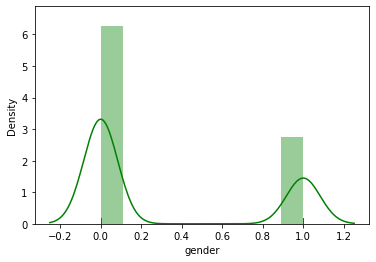

In [44]:
sns.distplot(trainc['gender'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

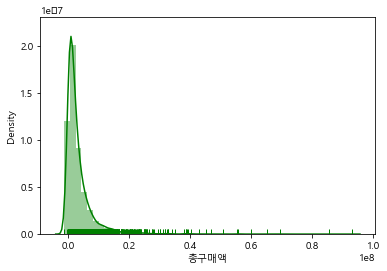

In [45]:
sns.distplot(trainc['총구매액'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

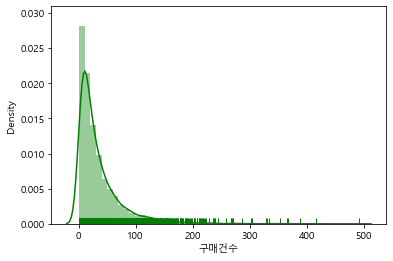

In [46]:
sns.distplot(trainc['구매건수'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

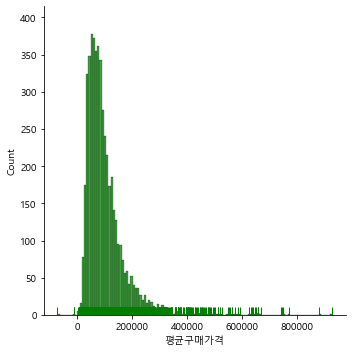

In [47]:
sns.displot(trainc['평균구매가격'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

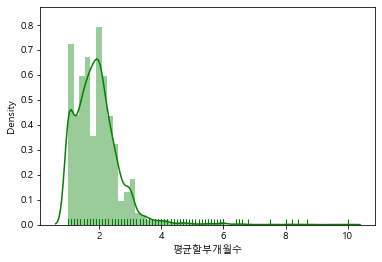

In [48]:
sns.distplot(trainc['평균할부개월수'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

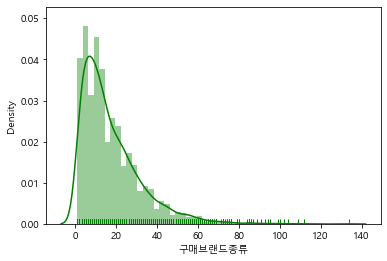

In [49]:
sns.distplot(trainc['구매브랜드종류'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

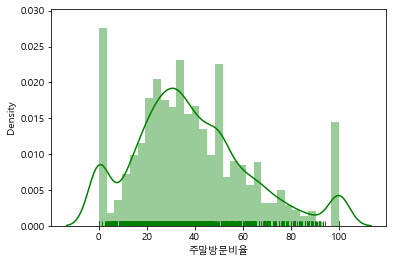

In [50]:
sns.distplot(trainc['주말방문비율'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

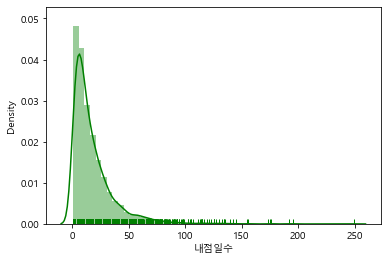

In [51]:
sns.distplot(trainc['내점일수'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

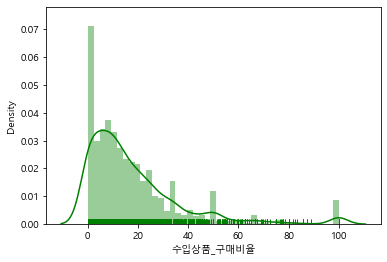

In [52]:
sns.distplot(trainc['수입상품_구매비율'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

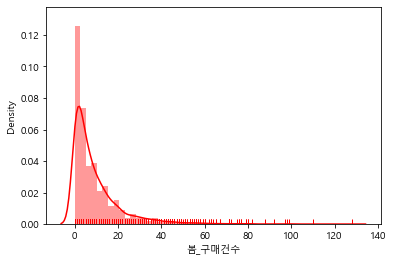

In [53]:
sns.distplot(trainc['봄_구매건수'], rug=True, color='red')
plt.rcParams['font.family'] = 'Malgun Gothic'

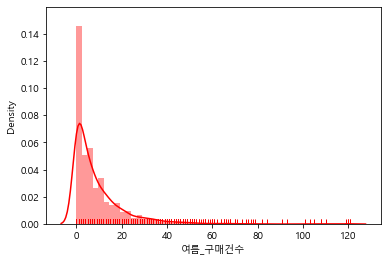

In [54]:
sns.distplot(trainc['여름_구매건수'], rug=True, color='red')
plt.rcParams['font.family'] = 'Malgun Gothic'

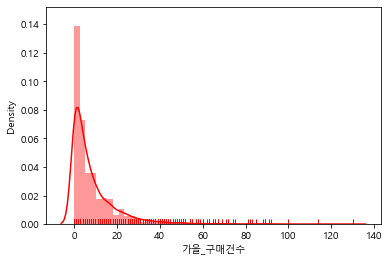

In [55]:
sns.distplot(trainc['가을_구매건수'], rug=True, color='red')
plt.rcParams['font.family'] = 'Malgun Gothic'

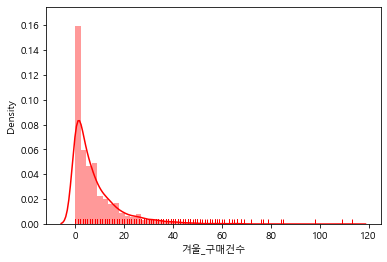

In [56]:
sns.distplot(trainc['겨울_구매건수'], rug=True, color='red')
plt.rcParams['font.family'] = 'Malgun Gothic'

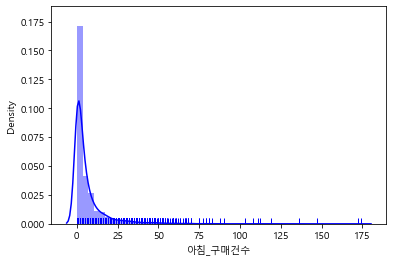

In [57]:
sns.distplot(trainc['아침_구매건수'], rug=True, color='blue')
plt.rcParams['font.family'] = 'Malgun Gothic'

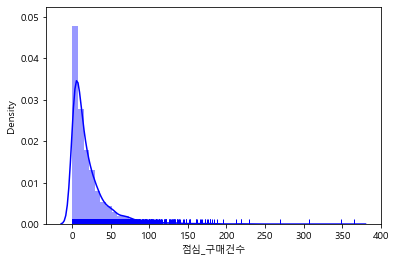

In [58]:
sns.distplot(trainc['점심_구매건수'], rug=True, color='blue')
plt.rcParams['font.family'] = 'Malgun Gothic'

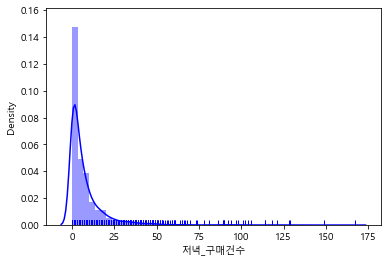

In [59]:
sns.distplot(trainc['저녁_구매건수'], rug=True, color='blue')
plt.rcParams['font.family'] = 'Malgun Gothic'

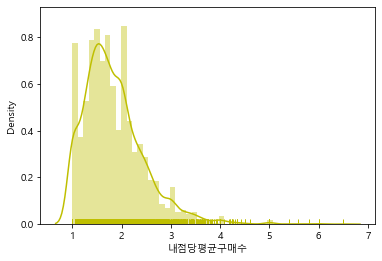

In [60]:
sns.distplot(trainc['내점당평균구매수'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

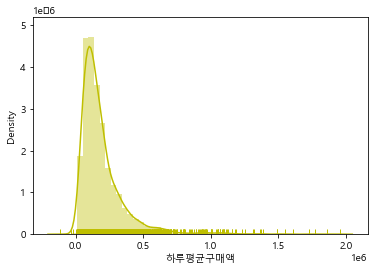

In [61]:
sns.distplot(trainc['하루평균구매액'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

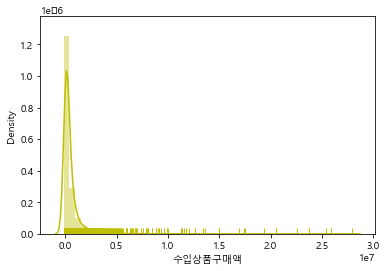

In [62]:
sns.distplot(trainc['수입상품구매액'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

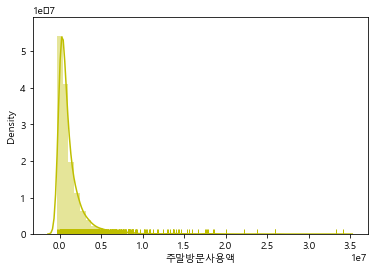

In [63]:
sns.distplot(trainc['주말방문사용액'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

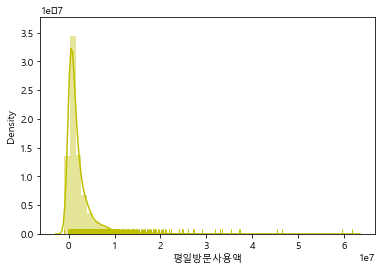

In [64]:
sns.distplot(trainc['평일방문사용액'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

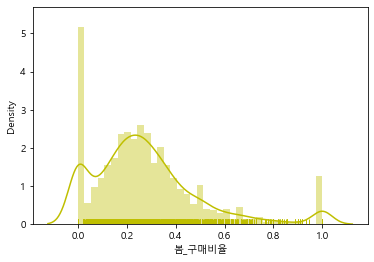

In [65]:
sns.distplot(trainc['봄_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

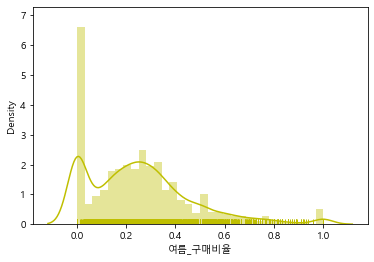

In [66]:
sns.distplot(trainc['여름_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

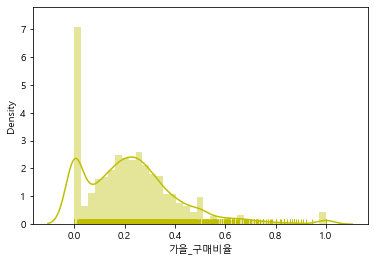

In [67]:
sns.distplot(trainc['가을_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

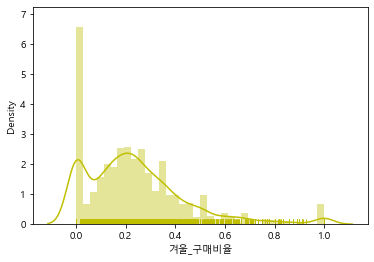

In [68]:
sns.distplot(trainc['겨울_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

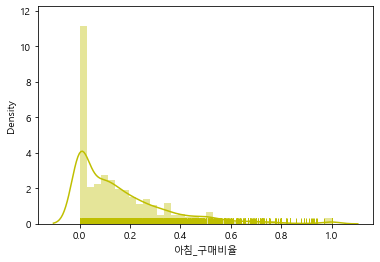

In [69]:
sns.distplot(trainc['아침_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

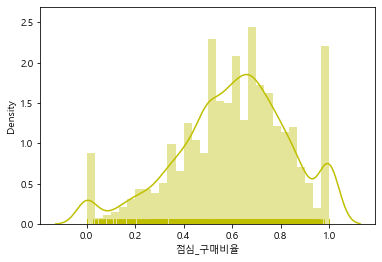

In [70]:
sns.distplot(trainc['점심_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

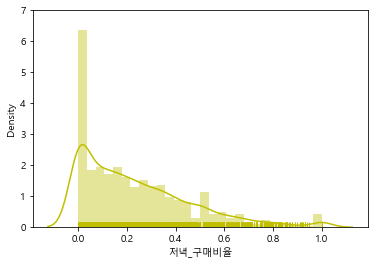

In [71]:
sns.distplot(trainc['저녁_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

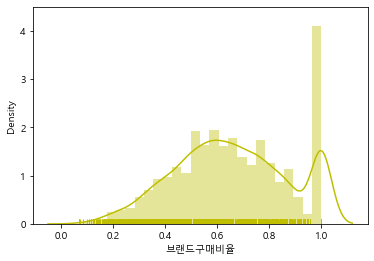

In [72]:
sns.distplot(trainc['브랜드구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:>

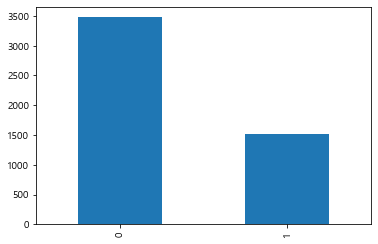

In [73]:
trainc['gender'].value_counts().plot(kind='bar')

In [74]:
trainc['gender'].value_counts() / trainc['gender'].count() * 100

0    69.58
1    30.42
Name: gender, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
dfx = trainc.drop(['gender', 'custid'], axis=1)
dfy = trainc['gender']
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.30, random_state=11)

<AxesSubplot:>

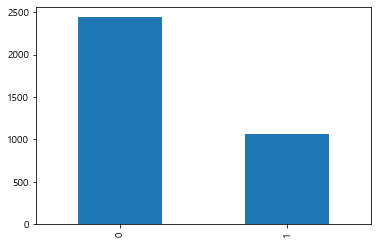

In [76]:
y_train.value_counts().plot(kind='bar')

In [77]:
y_train.value_counts() / y_train.count() * 100

0    69.742857
1    30.257143
Name: gender, dtype: float64

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
display(lr.score(x_test, y_test))

0.692

In [79]:
#!pip install lightgbm

In [80]:
#!pip install xgboost

In [81]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

In [82]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [83]:
params = {'max_depth':4,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [84]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[12:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67270	eval-logloss:0.67586
[1]	train-logloss:0.65600	eval-logloss:0.66227
[2]	train-logloss:0.64155	eval-logloss:0.65173
[3]	train-logloss:0.62993	eval-logloss:0.64243
[4]	train-logloss:0.61974	eval-logloss:0.63374
[5]	train-logloss:0.61080	eval-logloss:0.62738
[6]	train-logloss:0.60296	eval-logloss:0.62195
[7]	train-logloss:0.59625	eval-logloss:0.61756
[8]	train-logloss:0.58986	eval-logloss:0.61405
[9]	train-logloss:0.58421	eval-logloss:0.61090
[10]	train-logloss:0.57939	eval-logloss:0.60859
[11]	train-logloss:0.57559	eval-logloss:0.60699
[12]	train-logloss:0.57181	eval-logloss:0

[162]	train-logloss:0.39855	eval-logloss:0.61508
[163]	train-logloss:0.39803	eval-logloss:0.61509
[164]	train-logloss:0.39699	eval-logloss:0.61508
[165]	train-logloss:0.39633	eval-logloss:0.61482
[166]	train-logloss:0.39440	eval-logloss:0.61533
[167]	train-logloss:0.39425	eval-logloss:0.61546
[168]	train-logloss:0.39349	eval-logloss:0.61554
[169]	train-logloss:0.39202	eval-logloss:0.61562
[170]	train-logloss:0.39087	eval-logloss:0.61542
[171]	train-logloss:0.38990	eval-logloss:0.61558
[172]	train-logloss:0.38883	eval-logloss:0.61573
[173]	train-logloss:0.38836	eval-logloss:0.61611
[174]	train-logloss:0.38715	eval-logloss:0.61585
[175]	train-logloss:0.38605	eval-logloss:0.61567
[176]	train-logloss:0.38542	eval-logloss:0.61570
[177]	train-logloss:0.38505	eval-logloss:0.61558
[178]	train-logloss:0.38441	eval-logloss:0.61543
[179]	train-logloss:0.38341	eval-logloss:0.61542
[180]	train-logloss:0.38300	eval-logloss:0.61559
[181]	train-logloss:0.38284	eval-logloss:0.61579
[182]	train-logloss:

[330]	train-logloss:0.29014	eval-logloss:0.63931
[331]	train-logloss:0.28980	eval-logloss:0.63928
[332]	train-logloss:0.28961	eval-logloss:0.63930
[333]	train-logloss:0.28920	eval-logloss:0.63955
[334]	train-logloss:0.28855	eval-logloss:0.63968
[335]	train-logloss:0.28837	eval-logloss:0.63996
[336]	train-logloss:0.28778	eval-logloss:0.64035
[337]	train-logloss:0.28700	eval-logloss:0.64043
[338]	train-logloss:0.28625	eval-logloss:0.64070
[339]	train-logloss:0.28558	eval-logloss:0.64087
[340]	train-logloss:0.28541	eval-logloss:0.64119
[341]	train-logloss:0.28458	eval-logloss:0.64103
[342]	train-logloss:0.28363	eval-logloss:0.64162
[343]	train-logloss:0.28308	eval-logloss:0.64179
[344]	train-logloss:0.28262	eval-logloss:0.64188
[345]	train-logloss:0.28167	eval-logloss:0.64202
[346]	train-logloss:0.28158	eval-logloss:0.64215
[347]	train-logloss:0.28144	eval-logloss:0.64229
[348]	train-logloss:0.28106	eval-logloss:0.64231
[349]	train-logloss:0.28047	eval-logloss:0.64236
[350]	train-logloss:

In [85]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.368 0.215 0.267 0.467 0.633 0.244 0.221 0.384 0.383 0.946]


In [86]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [87]:
get_clf_eval(y_test, preds)

오차행렬
[[917 121]
 [377  85]]
정확도: 0.6680, 정밀도: 0.4126, 재현율: 0.1840


In [88]:
x_train.shape

(3500, 53)

In [89]:
col = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w',
       'x','y','z','a1','a2','a3','a4','a5','a6','a7','a8','a9','b1','b2','b3','b4','b5','b6','b7','b8',
      'b9','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [90]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(x_test, y_test)]
lgbm_wrapper.fit(x_train, y_train, feature_name=col, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(x_test)

[LightGBM] [Warning] Unknown parameter: nestimators
[1]	valid_0's binary_logloss: 0.613809
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.609257
[3]	valid_0's binary_logloss: 0.607147
[4]	valid_0's binary_logloss: 0.605497
[5]	valid_0's binary_logloss: 0.603487
[6]	valid_0's binary_logloss: 0.603081
[7]	valid_0's binary_logloss: 0.601687
[8]	valid_0's binary_logloss: 0.600339
[9]	valid_0's binary_logloss: 0.599323
[10]	valid_0's binary_logloss: 0.598401
[11]	valid_0's binary_logloss: 0.598363
[12]	valid_0's binary_logloss: 0.598585
[13]	valid_0's binary_logloss: 0.599358
[14]	valid_0's binary_logloss: 0.599529
[15]	valid_0's binary_logloss: 0.600361
[16]	valid_0's binary_logloss: 0.600262
[17]	valid_0's binary_logloss: 0.601177
[18]	valid_0's binary_logloss: 0.601325
[19]	valid_0's binary_logloss: 0.601061
[20]	valid_0's binary_logloss: 0.601053
[21]	valid_0's binary_logloss: 0.601657
[22]	valid_0's binary_logloss: 0.602894
[23]	valid_0's 

In [91]:
get_clf_eval(y_test, preds)

오차행렬
[[917 121]
 [377  85]]
정확도: 0.6680, 정밀도: 0.4126, 재현율: 0.1840


In [92]:
##### 이상치 처리

#####IQR활용

In [93]:
trainc.describe()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25200.496600,0.304200,3.360421e+06,34.538400,102564.0746,1.915660,17.368800,18.054800,17.989860,38.571880,...,0.013600,0.018000,0.005600,0.001600,0.037600,0.001200,0.018200,0.015000,0.011200,0.241200
std,14376.680764,0.460114,5.088433e+06,40.109424,79091.0458,0.730558,14.582432,19.369182,19.483598,24.509818,...,0.115835,0.132964,0.074631,0.039972,0.190246,0.034624,0.133687,0.121565,0.105246,0.427854
min,18.000000,0.000000,-1.237971e+06,1.000000,-72822.0000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12835.750000,0.000000,7.223850e+05,10.000000,54811.0000,1.400000,7.000000,6.000000,5.000000,22.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25345.000000,0.000000,1.806748e+06,21.000000,82201.5000,1.800000,13.000000,12.000000,12.500000,34.850000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37584.250000,1.000000,4.030409e+06,44.000000,124142.7500,2.200000,24.000000,23.000000,25.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49993.000000,1.000000,9.286883e+07,491.000000,926117.0000,10.000000,134.000000,249.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


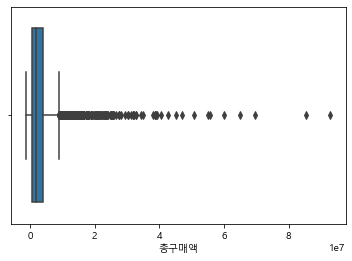

In [94]:
sns.boxplot(trainc['총구매액'])
plt.show()

In [95]:
q1 = trainc['총구매액'].quantile(.25)
q1

722385.0

In [96]:
q3 = trainc['총구매액'].quantile(.75)
q3

4030408.75

In [97]:
iqr = q3 - q1

In [98]:
bottomrange = q1 - (iqr*1.5)
bottomrange

-4239650.625

In [99]:
upperange = q3 + (iqr*1.5)
upperange

8992444.375

In [100]:
trainc0 = trainc[(trainc['총구매액'] > bottomrange) & (trainc['총구매액'] < upperange)]
trainc0

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


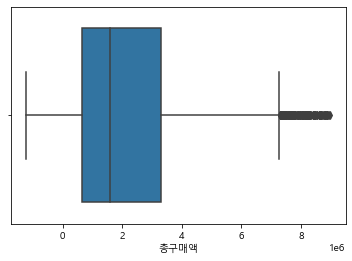

In [101]:
sns.boxplot(trainc0['총구매액'])
plt.show()

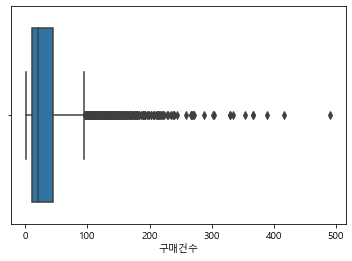

In [102]:
sns.boxplot(trainc['구매건수'])
plt.show()

In [103]:
q1 = trainc['구매건수'].quantile(.25)
q3 = trainc['구매건수'].quantile(.75)
iqr = q3 - q1
iqr

34.0

In [104]:
bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

In [105]:
trainc1 = trainc[(trainc['구매건수'] > bottomrange) & (trainc['구매건수'] < upperange)]
trainc1

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


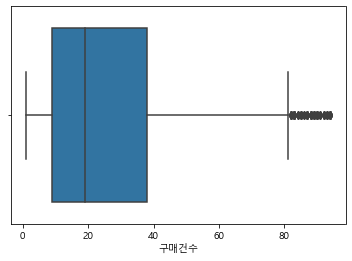

In [106]:
sns.boxplot(trainc1['구매건수'])
plt.show()

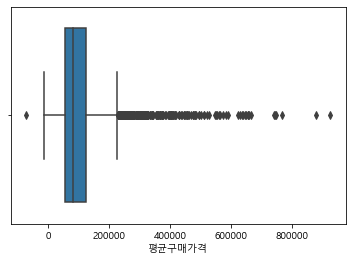

In [107]:
sns.boxplot(trainc['평균구매가격'])
plt.show()

In [108]:
q1 = trainc['평균구매가격'].quantile(.25)
q3 = trainc['평균구매가격'].quantile(.75)
iqr = q3 - q1
iqr

69331.75

In [109]:
bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

In [110]:
trainc2 = trainc[(trainc['평균구매가격'] > bottomrange) & (trainc['평균구매가격'] < upperange)]
trainc2

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


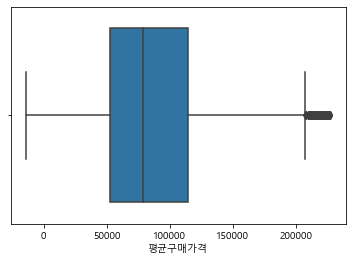

In [111]:
sns.boxplot(trainc2['평균구매가격'])
plt.show()

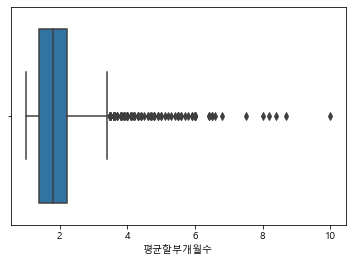

In [112]:
sns.boxplot(trainc['평균할부개월수'])
plt.show()

In [113]:
q1 = trainc['평균할부개월수'].quantile(.25)
q3 = trainc['평균할부개월수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc3 = trainc[(trainc['평균할부개월수'] > bottomrange) & (trainc['평균할부개월수'] < upperange)]
trainc3

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
5,50,0,3580200,36,99450,2.4,27,20,0.0,50.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,49946,1,13525907,240,56358,1.4,45,126,6.2,27.8,...,0,0,0,0,0,0,0,0,0,0
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


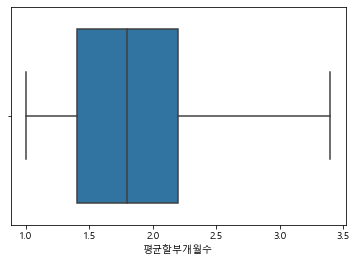

In [114]:
sns.boxplot(trainc3['평균할부개월수'])
plt.show()

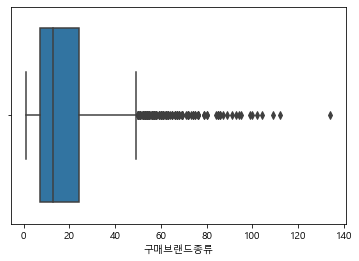

In [115]:
sns.boxplot(trainc['구매브랜드종류'])
plt.show()

In [116]:
q1 = trainc['구매브랜드종류'].quantile(.25)
q3 = trainc['구매브랜드종류'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc4 = trainc[(trainc['구매브랜드종류'] > bottomrange) & (trainc['구매브랜드종류'] < upperange)]
trainc4

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


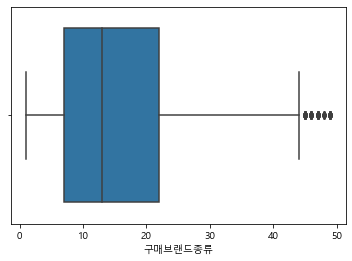

In [117]:
sns.boxplot(trainc4['구매브랜드종류'])
plt.show()

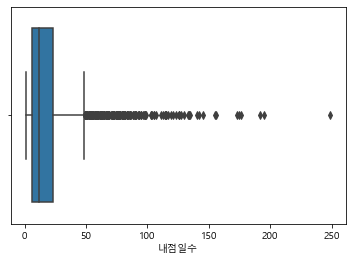

In [118]:
sns.boxplot(trainc['내점일수'])
plt.show()

In [119]:
q1 = trainc['내점일수'].quantile(.25)
q3 = trainc['내점일수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc5 = trainc[(trainc['내점일수'] > bottomrange) & (trainc['내점일수'] < upperange)]
trainc5

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


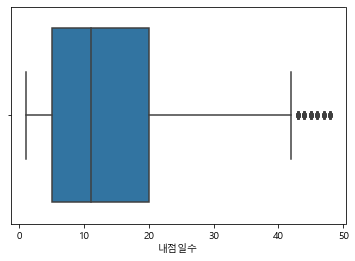

In [120]:
sns.boxplot(trainc5['내점일수'])
plt.show()

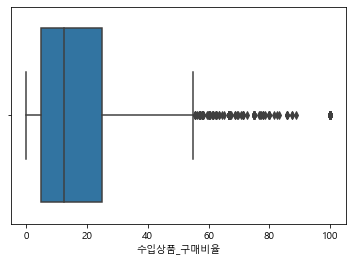

In [121]:
sns.boxplot(trainc['수입상품_구매비율'])
plt.show()

In [122]:
q1 = trainc['수입상품_구매비율'].quantile(.25)
q3 = trainc['수입상품_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc6 = trainc[(trainc['수입상품_구매비율'] > bottomrange) & (trainc['수입상품_구매비율'] < upperange)]
trainc6

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


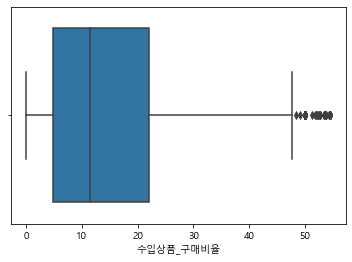

In [123]:
sns.boxplot(trainc6['수입상품_구매비율'])
plt.show()

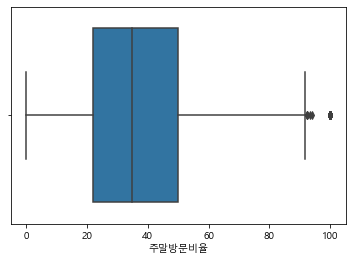

In [124]:
sns.boxplot(trainc['주말방문비율'])
plt.show()

In [125]:
q1 = trainc['주말방문비율'].quantile(.25)
q3 = trainc['주말방문비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc7 = trainc[(trainc['주말방문비율'] > bottomrange) & (trainc['주말방문비율'] < upperange)]
trainc7

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
5,50,0,3580200,36,99450,2.4,27,20,0.0,50.0,...,0,0,0,0,0,0,0,0,0,0
6,69,0,816300,14,58307,1.7,10,10,7.1,40.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


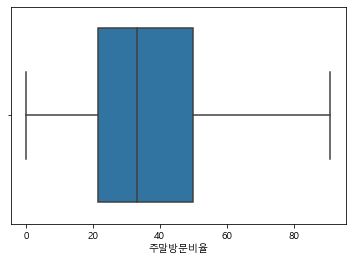

In [126]:
sns.boxplot(trainc7['주말방문비율'])
plt.show()

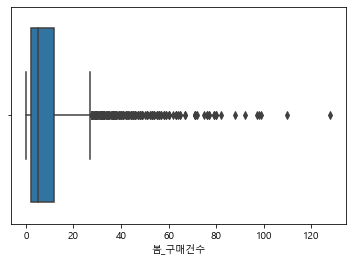

In [127]:
sns.boxplot(trainc['봄_구매건수'])
plt.show()

In [128]:
q1 = trainc['봄_구매건수'].quantile(.25)
q3 = trainc['봄_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc8 = trainc[(trainc['봄_구매건수'] > bottomrange) & (trainc['봄_구매건수'] < upperange)]
trainc8

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


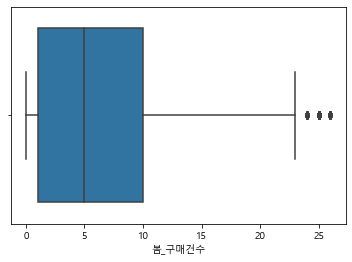

In [129]:
sns.boxplot(trainc8['봄_구매건수'])
plt.show()

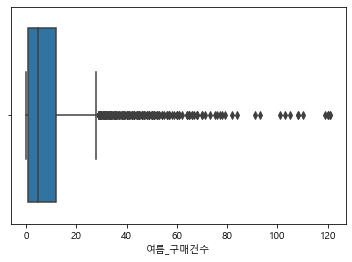

In [130]:
sns.boxplot(trainc['여름_구매건수'])
plt.show()

In [131]:
q1 = trainc['여름_구매건수'].quantile(.25)
q3 = trainc['여름_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc9 = trainc[(trainc['여름_구매건수'] > bottomrange) & (trainc['여름_구매건수'] < upperange)]
trainc9

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,49910,0,2363675,11,214880,2.8,8,9,36.4,44.4,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


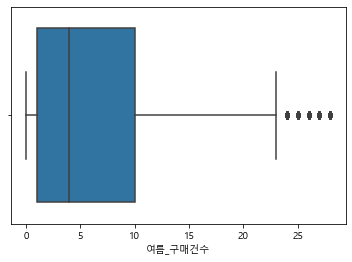

In [132]:
sns.boxplot(trainc9['여름_구매건수'])
plt.show()

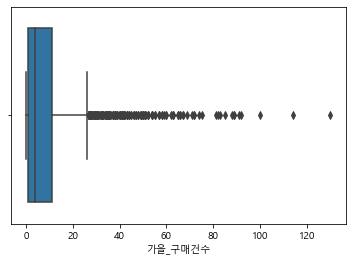

In [133]:
sns.boxplot(trainc['가을_구매건수'])
plt.show()

In [134]:
q1 = trainc['가을_구매건수'].quantile(.25)
q3 = trainc['가을_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc10 = trainc[(trainc['가을_구매건수'] > bottomrange) & (trainc['가을_구매건수'] < upperange)]
trainc10

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


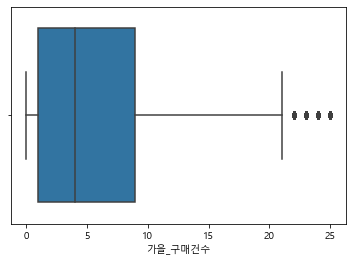

In [135]:
sns.boxplot(trainc10['가을_구매건수'])
plt.show()

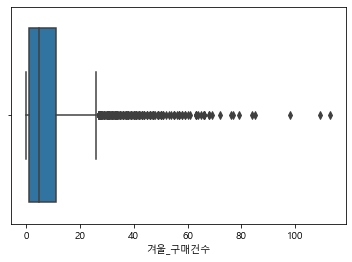

In [136]:
sns.boxplot(trainc['겨울_구매건수'])
plt.show()

In [137]:
q1 = trainc['겨울_구매건수'].quantile(.25)
q3 = trainc['겨울_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc11 = trainc[(trainc['겨울_구매건수'] > bottomrange) & (trainc['겨울_구매건수'] < upperange)]
trainc11

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,49910,0,2363675,11,214880,2.8,8,9,36.4,44.4,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


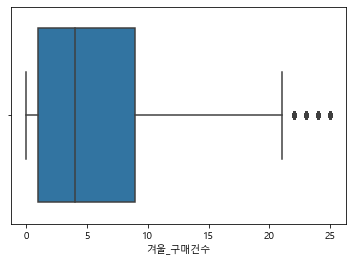

In [138]:
sns.boxplot(trainc11['겨울_구매건수'])
plt.show()

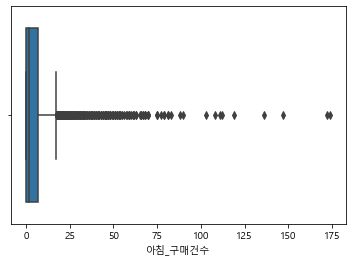

In [139]:
sns.boxplot(trainc['아침_구매건수'])
plt.show()

In [140]:
q1 = trainc['아침_구매건수'].quantile(.25)
q3 = trainc['아침_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc12 = trainc[(trainc['아침_구매건수'] > bottomrange) & (trainc['아침_구매건수'] < upperange)]
trainc12

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


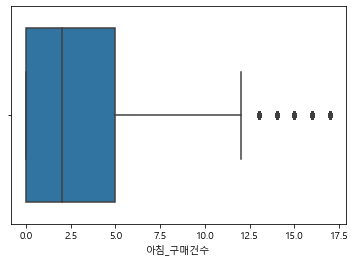

In [141]:
sns.boxplot(trainc12['아침_구매건수'])
plt.show()

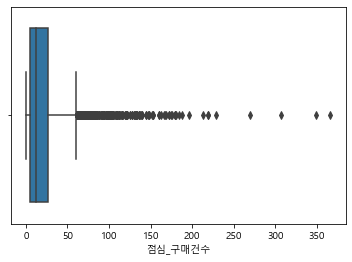

In [142]:
sns.boxplot(trainc['점심_구매건수'])
plt.show()

In [143]:
q1 = trainc['점심_구매건수'].quantile(.25)
q3 = trainc['점심_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc13 = trainc[(trainc['점심_구매건수'] > bottomrange) & (trainc['점심_구매건수'] < upperange)]
trainc13

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


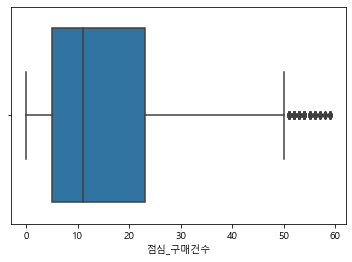

In [144]:
sns.boxplot(trainc13['점심_구매건수'])
plt.show()

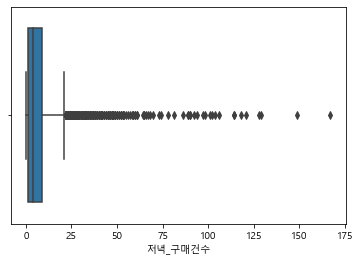

In [145]:
sns.boxplot(trainc['저녁_구매건수'])
plt.show()

In [146]:
q1 = trainc['저녁_구매건수'].quantile(.25)
q3 = trainc['저녁_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc14 = trainc[(trainc['저녁_구매건수'] > bottomrange) & (trainc['저녁_구매건수'] < upperange)]
trainc14

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,49910,0,2363675,11,214880,2.8,8,9,36.4,44.4,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


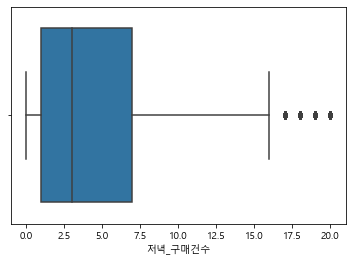

In [147]:
sns.boxplot(trainc14['저녁_구매건수'])
plt.show()

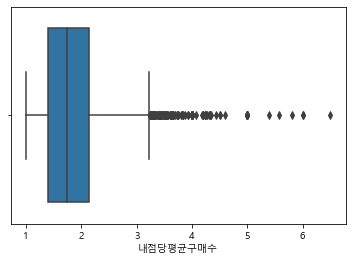

In [148]:
sns.boxplot(trainc['내점당평균구매수'])
plt.show()

In [149]:
q1 = trainc['내점당평균구매수'].quantile(.25)
q3 = trainc['내점당평균구매수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc15 = trainc[(trainc['내점당평균구매수'] > bottomrange) & (trainc['내점당평균구매수'] < upperange)]
trainc15

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


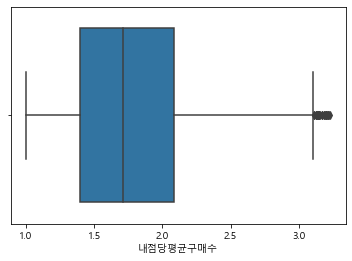

In [150]:
sns.boxplot(trainc15['내점당평균구매수'])
plt.show()

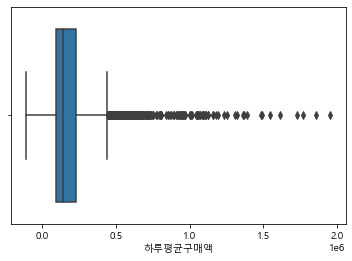

In [151]:
sns.boxplot(trainc['하루평균구매액'])
plt.show()

In [152]:
q1 = trainc['하루평균구매액'].quantile(.25)
q3 = trainc['하루평균구매액'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc16 = trainc[(trainc['하루평균구매액'] > bottomrange) & (trainc['하루평균구매액'] < upperange)]
trainc16

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
5,50,0,3580200,36,99450,2.4,27,20,0.0,50.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


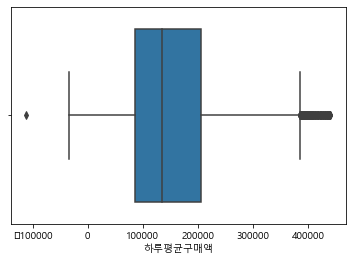

In [153]:
sns.boxplot(trainc16['하루평균구매액'])
plt.show()

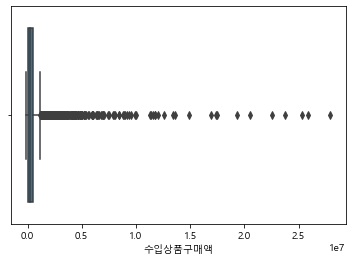

In [154]:
sns.boxplot(trainc['수입상품구매액'])
plt.show()

In [155]:
q1 = trainc['수입상품구매액'].quantile(.25)
q3 = trainc['수입상품구매액'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc17 = trainc[(trainc['수입상품구매액'] > bottomrange) & (trainc['수입상품구매액'] < upperange)]
trainc17

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,49946,1,13525907,240,56358,1.4,45,126,6.2,27.8,...,0,0,0,0,0,0,0,0,0,0
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


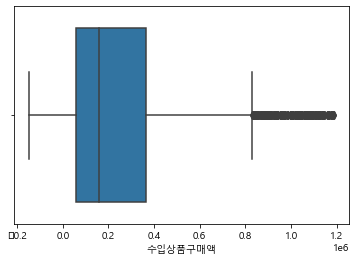

In [156]:
sns.boxplot(trainc17['수입상품구매액'])
plt.show()

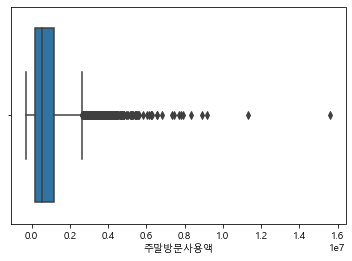

In [157]:
sns.boxplot(trainc17['주말방문사용액'])
plt.show()

In [158]:
q1 = trainc['주말방문사용액'].quantile(.25)
q3 = trainc['주말방문사용액'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc18 = trainc[(trainc['주말방문사용액'] > bottomrange) & (trainc['주말방문사용액'] < upperange)]
trainc18

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


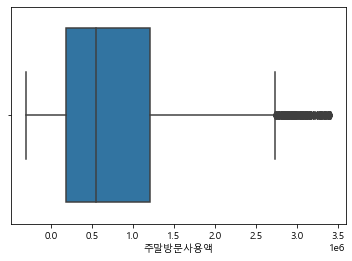

In [159]:
sns.boxplot(trainc18['주말방문사용액'])
plt.show()

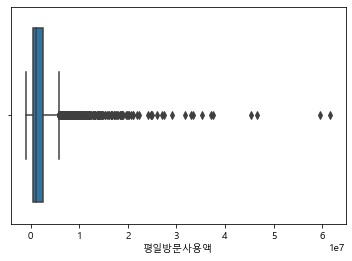

In [160]:
sns.boxplot(trainc['평일방문사용액'])
plt.show()

In [161]:
q1 = trainc['평일방문사용액'].quantile(.25)
q3 = trainc['평일방문사용액'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc19 = trainc[(trainc['평일방문사용액'] > bottomrange) & (trainc['평일방문사용액'] < upperange)]
trainc19

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


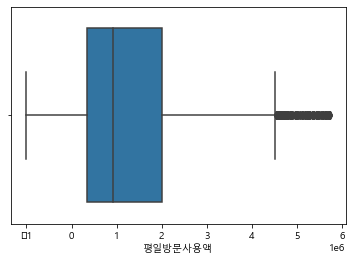

In [162]:
sns.boxplot(trainc19['평일방문사용액'])
plt.show()

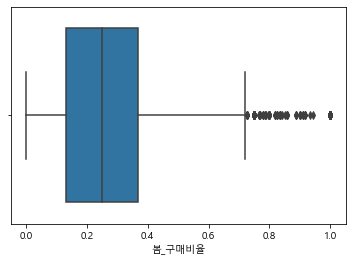

In [163]:
sns.boxplot(trainc['봄_구매비율'])
plt.show()

In [164]:
q1 = trainc['봄_구매비율'].quantile(.25)
q3 = trainc['봄_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc20 = trainc[(trainc['봄_구매비율'] > bottomrange) & (trainc['봄_구매비율'] < upperange)]
trainc20

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
5,50,0,3580200,36,99450,2.4,27,20,0.0,50.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


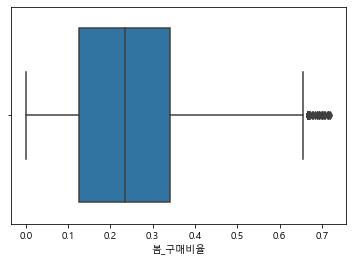

In [165]:
sns.boxplot(trainc20['봄_구매비율'])
plt.show()

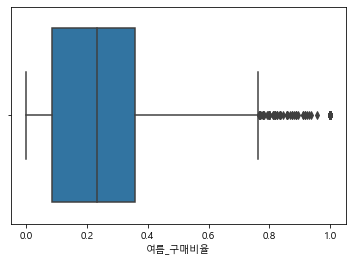

In [166]:
sns.boxplot(trainc['여름_구매비율'])
plt.show()

In [167]:
q1 = trainc['여름_구매비율'].quantile(.25)
q3 = trainc['여름_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc21 = trainc[(trainc['여름_구매비율'] > bottomrange) & (trainc['여름_구매비율'] < upperange)]
trainc21

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


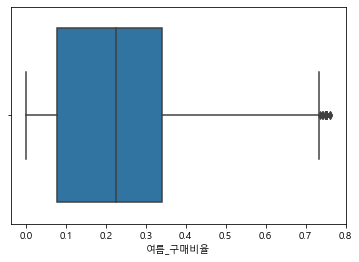

In [168]:
sns.boxplot(trainc21['여름_구매비율'])
plt.show()

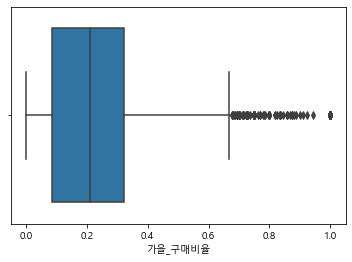

In [169]:
sns.boxplot(trainc['가을_구매비율'])
plt.show()

In [170]:
q1 = trainc['가을_구매비율'].quantile(.25)
q3 = trainc['가을_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc22 = trainc[(trainc['가을_구매비율'] > bottomrange) & (trainc['가을_구매비율'] < upperange)]
trainc22

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


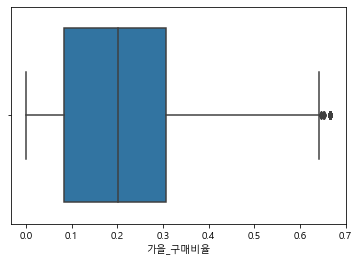

In [171]:
sns.boxplot(trainc22['가을_구매비율'])
plt.show()

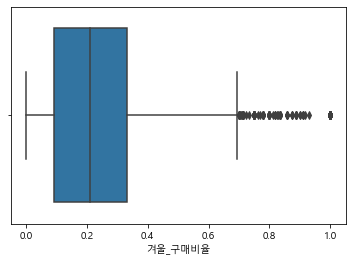

In [172]:
sns.boxplot(trainc['겨울_구매비율'])
plt.show()

In [173]:
q1 = trainc['겨울_구매비율'].quantile(.25)
q3 = trainc['겨울_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc23 = trainc[(trainc['겨울_구매비율'] > bottomrange) & (trainc['겨울_구매비율'] < upperange)]
trainc23

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


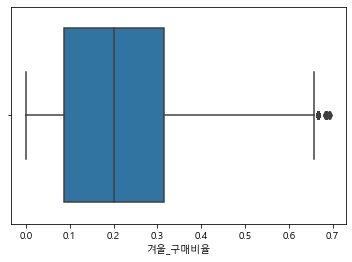

In [174]:
sns.boxplot(trainc23['겨울_구매비율'])
plt.show()

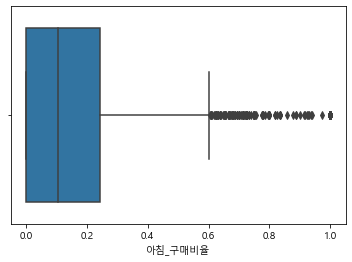

In [175]:
sns.boxplot(trainc['아침_구매비율'])
plt.show()

In [176]:
q1 = trainc['아침_구매비율'].quantile(.25)
q3 = trainc['아침_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc24 = trainc[(trainc['아침_구매비율'] > bottomrange) & (trainc['아침_구매비율'] < upperange)]
trainc24

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


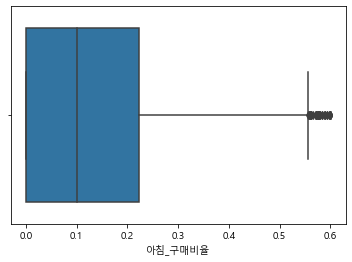

In [177]:
sns.boxplot(trainc24['아침_구매비율'])
plt.show()

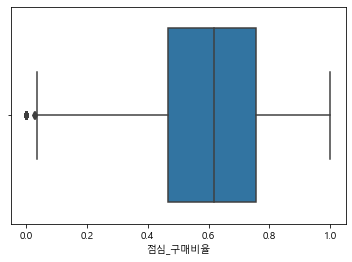

In [178]:
sns.boxplot(trainc['점심_구매비율'])
plt.show()

In [179]:
q1 = trainc['점심_구매비율'].quantile(.25)
q3 = trainc['점심_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc25 = trainc[(trainc['점심_구매비율'] > bottomrange) & (trainc['점심_구매비율'] < upperange)]
trainc25

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
5,50,0,3580200,36,99450,2.4,27,20,0.0,50.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


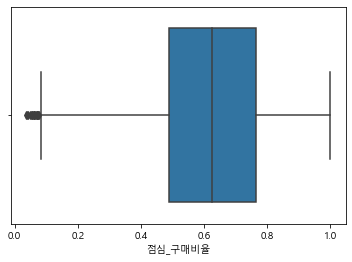

In [180]:
sns.boxplot(trainc25['점심_구매비율'])
plt.show()

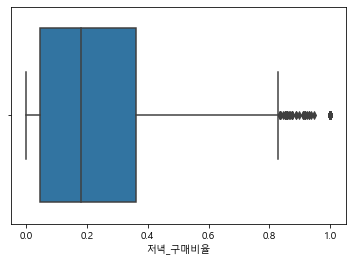

In [181]:
sns.boxplot(trainc['저녁_구매비율'])
plt.show()

In [182]:
q1 = trainc['저녁_구매비율'].quantile(.25)
q3 = trainc['저녁_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc26 = trainc[(trainc['저녁_구매비율'] > bottomrange) & (trainc['저녁_구매비율'] < upperange)]
trainc26

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,0,0,0,0,0,0,0,0,0,0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,0,0,0,0,0,0,0,0,0,1
5,50,0,3580200,36,99450,2.4,27,20,0.0,50.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,0,0,0,0,0,0,0,1,0,0


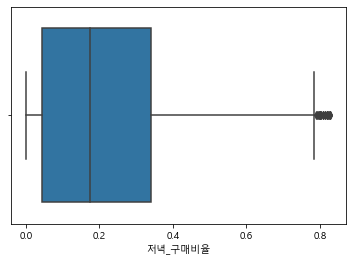

In [183]:
sns.boxplot(trainc26['저녁_구매비율'])
plt.show()

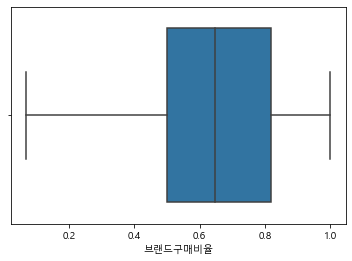

In [184]:
sns.boxplot(trainc['브랜드구매비율'])
plt.show()

In [185]:
trainc = trainc.drop(['총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류', '내점일수',
            '수입상품_구매비율', '주말방문비율', '봄_구매건수', '여름_구매건수', '가을_구매건수',
            '겨울_구매건수', '아침_구매건수', '점심_구매건수', '저녁_구매건수', '내점당평균구매수',
            '하루평균구매액', '하루평균구매액', '수입상품구매액', '주말방문사용액', '평일방문사용액',
            '봄_구매비율', '여름_구매비율', '가을_구매비율', '겨울_구매비율', '아침_구매비율',
            '점심_구매비율', '저녁_구매비율'], axis=1)
trainc

,custid,gender,브랜드구매비율,주구매코너_0,주구매코너_1,주구매코너_2,주구매코너_3,주구매코너_4,주구매코너_5,주구매코너_6,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,18,0,0.600000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,0.666667,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0.611111,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,0.535714,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,0.290323,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,0.588235,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,0.378378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,0.769231,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [186]:
trainc = pd.concat([trainc, trainc0['총구매액'], trainc1['구매건수'], trainc2['평균구매가격'], trainc3['평균할부개월수'],
                   trainc4['구매브랜드종류'], trainc5['내점일수'], trainc6['수입상품_구매비율'], trainc7['주말방문비율'],
                   trainc8['봄_구매건수'], trainc9['여름_구매건수'], trainc10['가을_구매건수'], trainc11['겨울_구매건수'],
                   trainc12['아침_구매건수'], trainc13['점심_구매건수'], trainc14['저녁_구매건수'], trainc15['내점당평균구매수'],
                   trainc16['하루평균구매액'], trainc17['수입상품구매액'], trainc18['주말방문사용액'],
                   trainc19['평일방문사용액'], trainc20['봄_구매비율'], trainc21['여름_구매비율'], trainc22['가을_구매비율'],
                   trainc23['겨울_구매비율'], trainc24['아침_구매비율'], trainc25['점심_구매비율'], trainc26['저녁_구매비율']], axis=1)
trainc

,custid,gender,브랜드구매비율,주구매코너_0,주구매코너_1,주구매코너_2,주구매코너_3,주구매코너_4,주구매코너_5,주구매코너_6,...,수입상품구매액,주말방문사용액,평일방문사용액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율
0,18,0,0.600000,0,0,0,0,0,0,0,...,181586.700,680100.000,0.000,0.400000,0.000000,0.000000,0.600000,0.000000,0.600000,0.400000
1,21,0,0.666667,0,0,0,0,0,0,0,...,39232.950,132543.750,220906.250,0.444444,0.000000,0.000000,0.555556,0.333333,0.666667,0.000000
2,23,0,0.611111,0,0,0,0,0,0,0,...,317598.400,2126775.000,3544625.000,0.333333,0.000000,0.194444,0.472222,0.277778,0.416667,0.305556
3,26,0,0.535714,0,0,0,0,0,0,0,...,771852.000,561704.000,1402296.000,0.535714,0.000000,0.178571,0.285714,0.000000,0.357143,0.642857
4,35,0,1.000000,0,0,0,0,0,0,0,...,0.000,885000.000,0.000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,0.290323,0,0,0,0,0,0,0,...,719983.836,2906601.412,3759915.588,0.150538,0.354839,0.139785,0.354839,0.086022,0.473118,0.440860
4996,49954,0,0.588235,0,0,0,0,0,1,0,...,914957.400,1198158.500,1913941.500,0.352941,0.058824,0.235294,0.352941,0.176471,0.823529,0.000000
4997,49957,1,0.378378,0,0,0,0,0,0,0,...,NaN,1111971.580,4740510.420,0.162162,0.351351,0.324324,0.162162,0.432432,0.567568,0.000000
4998,49975,1,0.769231,0,0,0,0,0,0,0,...,50396.346,93593.214,560904.786,0.153846,0.076923,0.461538,0.307692,0.000000,0.846154,0.153846


In [187]:
trainc.shape

(5000, 55)

In [188]:
trainc.isnull().sum()

custid         0
gender         0
브랜드구매비율        0
주구매코너_0        0
주구매코너_1        0
주구매코너_2        0
주구매코너_3        0
주구매코너_4        0
주구매코너_5        0
주구매코너_6        0
주구매코너_7        0
주구매코너_8        0
주구매코너_9        0
주구매코너_10       0
주구매코너_11       0
주구매코너_12       0
주구매코너_13       0
주구매코너_14       0
주구매코너_15       0
주구매코너_16       0
주구매코너_17       0
주구매코너_18       0
주구매코너_19       0
주구매코너_20       0
주구매코너_21       0
주구매코너_22       0
주구매코너_23       0
주구매코너_24       0
총구매액         387
구매건수         361
평균구매가격       287
평균할부개월수      132
구매브랜드종류      194
내점일수         327
수입상품_구매비율    243
주말방문비율       243
봄_구매건수       376
여름_구매건수      334
가을_구매건수      331
겨울_구매건수      339
아침_구매건수      457
점심_구매건수      349
저녁_구매건수      420
내점당평균구매수     160
하루평균구매액      334
수입상품구매액      518
주말방문사용액      381
평일방문사용액      411
봄_구매비율       259
여름_구매비율      149
가을_구매비율      145
겨울_구매비율      193
아침_구매비율      179
점심_구매비율      147
저녁_구매비율      117
dtype: int64

In [189]:
trainc = trainc.dropna()
trainc

,custid,gender,브랜드구매비율,주구매코너_0,주구매코너_1,주구매코너_2,주구매코너_3,주구매코너_4,주구매코너_5,주구매코너_6,...,수입상품구매액,주말방문사용액,평일방문사용액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율
1,21,0,0.666667,0,0,0,0,0,0,0,...,39232.950,132543.750,220906.250,0.444444,0.000000,0.000000,0.555556,0.333333,0.666667,0.000000
2,23,0,0.611111,0,0,0,0,0,0,0,...,317598.400,2126775.000,3544625.000,0.333333,0.000000,0.194444,0.472222,0.277778,0.416667,0.305556
3,26,0,0.535714,0,0,0,0,0,0,0,...,771852.000,561704.000,1402296.000,0.535714,0.000000,0.178571,0.285714,0.000000,0.357143,0.642857
5,50,0,0.750000,0,0,0,0,0,0,0,...,0.000,1790100.000,1790100.000,0.222222,0.388889,0.194444,0.194444,0.027778,0.666667,0.305556
6,69,0,0.714286,0,0,0,0,0,0,0,...,57957.300,326520.000,489780.000,0.428571,0.000000,0.285714,0.285714,0.000000,0.785714,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,49894,0,0.384615,0,0,0,0,0,0,0,...,106875.615,346998.750,1040996.250,0.230769,0.000000,0.307692,0.461538,0.538462,0.461538,0.000000
4992,49909,0,0.666667,0,0,0,0,0,0,0,...,461000.000,230500.000,691500.000,0.000000,0.333333,0.666667,0.000000,0.000000,0.833333,0.166667
4993,49910,0,0.727273,0,0,0,0,0,0,0,...,860377.700,1049471.700,1314203.300,0.090909,0.272727,0.272727,0.363636,0.363636,0.454545,0.181818
4998,49975,1,0.769231,0,0,0,0,0,0,0,...,50396.346,93593.214,560904.786,0.153846,0.076923,0.461538,0.307692,0.000000,0.846154,0.153846


In [190]:
trainc.isnull().sum()

custid       0
gender       0
브랜드구매비율      0
주구매코너_0      0
주구매코너_1      0
주구매코너_2      0
주구매코너_3      0
주구매코너_4      0
주구매코너_5      0
주구매코너_6      0
주구매코너_7      0
주구매코너_8      0
주구매코너_9      0
주구매코너_10     0
주구매코너_11     0
주구매코너_12     0
주구매코너_13     0
주구매코너_14     0
주구매코너_15     0
주구매코너_16     0
주구매코너_17     0
주구매코너_18     0
주구매코너_19     0
주구매코너_20     0
주구매코너_21     0
주구매코너_22     0
주구매코너_23     0
주구매코너_24     0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
봄_구매건수       0
여름_구매건수      0
가을_구매건수      0
겨울_구매건수      0
아침_구매건수      0
점심_구매건수      0
저녁_구매건수      0
내점당평균구매수     0
하루평균구매액      0
수입상품구매액      0
주말방문사용액      0
평일방문사용액      0
봄_구매비율       0
여름_구매비율      0
가을_구매비율      0
겨울_구매비율      0
아침_구매비율      0
점심_구매비율      0
저녁_구매비율      0
dtype: int64

In [191]:
from sklearn.model_selection import train_test_split
dfx = trainc.drop(['gender', 'custid'], axis=1)
dfy = trainc['gender']
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.30, random_state=11)

<AxesSubplot:>

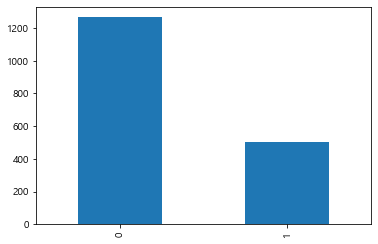

In [192]:
y_train.value_counts().plot(kind='bar')

In [193]:
y_train.value_counts() / y_train.count() * 100

0    71.606335
1    28.393665
Name: gender, dtype: float64

In [194]:
##### 불균형데이터 처리를 위해 복합샘플링(SMOTE사용)

In [195]:
#!pip install imblearn

In [196]:
from sklearn.metrics import classification_report
lr0 = LogisticRegression(random_state=0)

lr0.fit(x_train, y_train)
y_pred0 = lr0.predict(x_test)

print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       547
           1       0.00      0.00      0.00       211

    accuracy                           0.72       758
   macro avg       0.36      0.50      0.42       758
weighted avg       0.52      0.72      0.60       758



In [197]:
from imblearn.combine import *
from imblearn.combine import SMOTETomek

In [198]:
xx, yy = SMOTETomek().fit_sample(x_train, y_train)

lr0 = LogisticRegression(random_state=0)
lr0.fit(xx, yy)
y_pred0 = lr0.predict(x_test)

print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53       547
           1       0.28      0.57      0.37       211

    accuracy                           0.47       758
   macro avg       0.50      0.50      0.45       758
weighted avg       0.60      0.47      0.49       758



In [199]:
xx, yy = SMOTETomek(random_state=0).fit_sample(x_train, y_train)

lr1 = LogisticRegression()
lr1.fit(xx, yy)
y_pred1 = lr1.predict(x_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.43      0.54       547
           1       0.27      0.55      0.36       211

    accuracy                           0.46       758
   macro avg       0.49      0.49      0.45       758
weighted avg       0.59      0.46      0.49       758



In [200]:
xx.shape

(2320, 53)

In [201]:
yy.shape

(2320,)

In [202]:
yy.value_counts()

1    1160
0    1160
Name: gender, dtype: int64

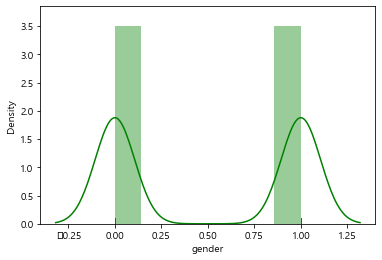

In [203]:
sns.distplot(pd.DataFrame(yy)['gender'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

In [204]:
from sklearn.dummy import DummyClassifier
print(pd.DataFrame(y_train).value_counts())
DummyClassifier(strategy='most_frequent').fit(x_train, y_train).score(x_test, y_test)

gender
0         1266
1          502
dtype: int64


0.7216358839050132

In [205]:
dtrain = xgb.DMatrix(data=xx, label=yy)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [206]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [207]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[12:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67986	eval-logloss:0.68702
[1]	train-logloss:0.66897	eval-logloss:0.68165
[2]	train-logloss:0.65952	eval-logloss:0.67724
[3]	train-logloss:0.65175	eval-logloss:0.67211
[4]	train-logloss:0.64380	eval-logloss:0.66981
[5]	train-logloss:0.63719	eval-logloss:0.66689
[6]	train-logloss:0.63028	eval-logloss:0.66551
[7]	train-logloss:0.62467	eval-logloss:0.66257
[8]	train-logloss:0.61895	eval-logloss:0.66139
[9]	train-logloss:0.61414	eval-logloss:0.65789
[10]	train-logloss:0.60859	eval-logloss:0.65773
[11]	train-logloss:0.60263	eval-logloss:0.65445
[12]	train-logloss:0.59809	eval-logloss:0

[162]	train-logloss:0.36838	eval-logloss:0.61847
[163]	train-logloss:0.36774	eval-logloss:0.61830
[164]	train-logloss:0.36716	eval-logloss:0.61867
[165]	train-logloss:0.36574	eval-logloss:0.61840
[166]	train-logloss:0.36433	eval-logloss:0.61788
[167]	train-logloss:0.36385	eval-logloss:0.61789
[168]	train-logloss:0.36349	eval-logloss:0.61811
[169]	train-logloss:0.36288	eval-logloss:0.61871
[170]	train-logloss:0.36133	eval-logloss:0.61835
[171]	train-logloss:0.36073	eval-logloss:0.61818
[172]	train-logloss:0.36019	eval-logloss:0.61801
[173]	train-logloss:0.35892	eval-logloss:0.61804
[174]	train-logloss:0.35839	eval-logloss:0.61807
[175]	train-logloss:0.35741	eval-logloss:0.61812
[176]	train-logloss:0.35598	eval-logloss:0.61855
[177]	train-logloss:0.35568	eval-logloss:0.61870
[178]	train-logloss:0.35479	eval-logloss:0.61905
[179]	train-logloss:0.35431	eval-logloss:0.61865
[180]	train-logloss:0.35357	eval-logloss:0.61872
[181]	train-logloss:0.35314	eval-logloss:0.61825
[182]	train-logloss:

[330]	train-logloss:0.26025	eval-logloss:0.62725
[331]	train-logloss:0.25963	eval-logloss:0.62726
[332]	train-logloss:0.25868	eval-logloss:0.62776
[333]	train-logloss:0.25831	eval-logloss:0.62803
[334]	train-logloss:0.25792	eval-logloss:0.62817
[335]	train-logloss:0.25719	eval-logloss:0.62776
[336]	train-logloss:0.25613	eval-logloss:0.62820
[337]	train-logloss:0.25550	eval-logloss:0.62881
[338]	train-logloss:0.25476	eval-logloss:0.62930
[339]	train-logloss:0.25405	eval-logloss:0.62918
[340]	train-logloss:0.25350	eval-logloss:0.63015
[341]	train-logloss:0.25268	eval-logloss:0.63035
[342]	train-logloss:0.25199	eval-logloss:0.63051
[343]	train-logloss:0.25126	eval-logloss:0.63098
[344]	train-logloss:0.25070	eval-logloss:0.63139
[345]	train-logloss:0.25016	eval-logloss:0.63212
[346]	train-logloss:0.24951	eval-logloss:0.63254
[347]	train-logloss:0.24882	eval-logloss:0.63325
[348]	train-logloss:0.24819	eval-logloss:0.63340
[349]	train-logloss:0.24796	eval-logloss:0.63321
[350]	train-logloss:

In [208]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.459 0.623 0.295 0.277 0.199 0.437 0.36  0.122 0.353 0.234]


In [209]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [210]:
get_clf_eval(y_test, preds)

오차행렬
[[451  96]
 [152  59]]
정확도: 0.6728, 정밀도: 0.3806, 재현율: 0.2796


In [211]:
xx.columns

Index(['브랜드구매비율', '주구매코너_0', '주구매코너_1', '주구매코너_2', '주구매코너_3', '주구매코너_4',
       '주구매코너_5', '주구매코너_6', '주구매코너_7', '주구매코너_8', '주구매코너_9', '주구매코너_10',
       '주구매코너_11', '주구매코너_12', '주구매코너_13', '주구매코너_14', '주구매코너_15', '주구매코너_16',
       '주구매코너_17', '주구매코너_18', '주구매코너_19', '주구매코너_20', '주구매코너_21', '주구매코너_22',
       '주구매코너_23', '주구매코너_24', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류',
       '내점일수', '수입상품_구매비율', '주말방문비율', '봄_구매건수', '여름_구매건수', '가을_구매건수',
       '겨울_구매건수', '아침_구매건수', '점심_구매건수', '저녁_구매건수', '내점당평균구매수', '하루평균구매액',
       '수입상품구매액', '주말방문사용액', '평일방문사용액', '봄_구매비율', '여름_구매비율', '가을_구매비율',
       '겨울_구매비율', '아침_구매비율', '점심_구매비율', '저녁_구매비율'],
      dtype='object')

In [212]:
xx.shape

(2320, 53)

In [213]:
col = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w',
       'x','y','z','a1','a2','a3','a4','a5','a6','a7','a8','a9','b1','b2','b3','b4','b5','b6','b7','b8',
      'b9','c1','c2','c3','c4','c5','c6','c7','c8','c9']
len(col)

53

In [214]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(x_test, y_test)]
lgbm_wrapper.fit(xx, yy, feature_name=col, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(x_test)

[LightGBM] [Warning] Unknown parameter: nestimators
[1]	valid_0's binary_logloss: 0.680065
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.668505
[3]	valid_0's binary_logloss: 0.657187
[4]	valid_0's binary_logloss: 0.648141
[5]	valid_0's binary_logloss: 0.640126
[6]	valid_0's binary_logloss: 0.63472
[7]	valid_0's binary_logloss: 0.628799
[8]	valid_0's binary_logloss: 0.624534
[9]	valid_0's binary_logloss: 0.622971
[10]	valid_0's binary_logloss: 0.620538
[11]	valid_0's binary_logloss: 0.617392
[12]	valid_0's binary_logloss: 0.615088
[13]	valid_0's binary_logloss: 0.611004
[14]	valid_0's binary_logloss: 0.611248
[15]	valid_0's binary_logloss: 0.608414
[16]	valid_0's binary_logloss: 0.60592
[17]	valid_0's binary_logloss: 0.604794
[18]	valid_0's binary_logloss: 0.603752
[19]	valid_0's binary_logloss: 0.603713
[20]	valid_0's binary_logloss: 0.603795
[21]	valid_0's binary_logloss: 0.60322
[22]	valid_0's binary_logloss: 0.600659
[23]	valid_0's bin

In [215]:
get_clf_eval(y_test, preds)

오차행렬
[[451  96]
 [152  59]]
정확도: 0.6728, 정밀도: 0.3806, 재현율: 0.2796


In [216]:
##### Scaler 적용

In [217]:
##### MinMaxScaler

In [218]:
xxx = xx.copy()

In [219]:
yy.value_counts()

1    1160
0    1160
Name: gender, dtype: int64

In [220]:
from sklearn.preprocessing import MinMaxScaler

In [221]:
scaler = MinMaxScaler()
scaler.fit(xxx)

MinMaxScaler()

In [222]:
s = scaler.transform(xxx)
xxx = pd.DataFrame(s, columns=xxx.columns)

In [223]:
xxx.shape

(2320, 53)

In [224]:
from sklearn.svm import SVC
svm = SVC(C=50)
svm.fit(xxx, yy).score(x_test, y_test)

0.7216358839050132

In [225]:
xxx

,브랜드구매비율,주구매코너_0,주구매코너_1,주구매코너_2,주구매코너_3,주구매코너_4,주구매코너_5,주구매코너_6,주구매코너_7,주구매코너_8,...,수입상품구매액,주말방문사용액,평일방문사용액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율
0,0.783681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.354179,0.702311,0.329189,0.270968,0.423387,0.000000,0.698925,0.107527,0.793548,0.157706
1,0.805627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.216751,0.010987,0.486957,0.228261,0.065217,0.628019,0.000000,0.397101,0.690821
2,0.254902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039093,0.112696,0.240230,0.287179,0.302885,0.538462,0.296296,0.170940,0.808547,0.094017
3,0.562660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.473216,0.332972,0.116620,0.304348,0.000000,0.195652,0.942029,0.000000,0.721739,0.318841
4,0.712605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.441711,0.676310,0.121496,0.720000,0.450000,0.085714,0.123810,0.428571,0.573333,0.174603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,0.856436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.154503,0.204416,0.121288,0.099582,0.638127,0.536610,0.122688,0.126221,0.613501,0.350301
2316,0.518847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.365082,0.831278,0.165514,0.593905,0.104380,0.178754,0.544678,0.040689,0.705294,0.307845
2317,0.565011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.372878,0.498516,0.335888,0.120885,0.279149,0.545976,0.486756,0.243250,0.665546,0.204846
2318,0.596025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.178763,0.723901,0.327336,0.314499,0.492251,0.175248,0.409467,0.051338,0.826094,0.161619


In [226]:
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(), threshold=None)

In [227]:
xxx_fs = select.fit(xxx, yy).transform(xxx)
print('x_train_std.shape: {}, x_train_fs.shape: {}'.format(xxx.shape, xxx_fs.shape))

x_train_std.shape: (2320, 53), x_train_fs.shape: (2320, 29)


In [228]:
xxx_fs

array([[0.78368121, 0.        , 0.52856838, ..., 0.10752688, 0.79354839,
        0.15770609],
       [0.8056266 , 0.        , 0.09999468, ..., 0.        , 0.39710145,
        0.69082126],
       [0.25490196, 0.        , 0.21536806, ..., 0.17094017, 0.80854701,
        0.09401709],
       ...,
       [0.56501144, 0.        , 0.4464023 , ..., 0.24325018, 0.66554561,
        0.20484552],
       [0.5960251 , 0.        , 0.53647665, ..., 0.05133823, 0.82609443,
        0.16161876],
       [0.69293142, 0.        , 0.50382035, ..., 0.22324042, 0.74380451,
        0.1298477 ]])

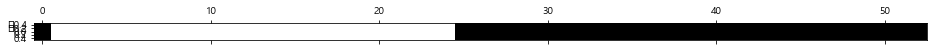

In [229]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [230]:
x_test_fs = select.transform(x_test)
svm.fit(xxx_fs, yy).score(x_test_fs, y_test)

0.7216358839050132

In [231]:
display(xxx.shape, x_test.shape)
display(yy.shape, y_test.shape)

(2320, 53)

(758, 53)

(2320,)

(758,)

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model = KNeighborsClassifier()

In [233]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xxx, yy)
scores

array([0.58189655, 0.62068966, 0.82112069, 0.81896552, 0.83405172])

In [234]:
scores = cross_val_score(model, xxx, yy, cv=5)
scores

array([0.58189655, 0.62068966, 0.82112069, 0.81896552, 0.83405172])

In [235]:
print(scores.mean())

0.7353448275862069


In [236]:
model = LogisticRegression()

In [237]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xxx, yy)
scores

array([0.5237069 , 0.5862069 , 0.86422414, 0.82758621, 0.85344828])

In [238]:
scores = cross_val_score(model, xxx, yy, cv=5)
scores

array([0.5237069 , 0.5862069 , 0.86422414, 0.82758621, 0.85344828])

In [239]:
print(scores.mean())

0.7310344827586206


In [240]:
model = DecisionTreeClassifier()

In [241]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xxx, yy)
scores

array([0.57758621, 0.58836207, 0.73922414, 0.73922414, 0.76293103])

In [242]:
scores = cross_val_score(model, xxx, yy, cv=5)
scores

array([0.5625    , 0.57543103, 0.74353448, 0.74568966, 0.78232759])

In [243]:
print(scores.mean())

0.6818965517241379


In [244]:
from sklearn.model_selection import ShuffleSplit

sscv = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(model, xxx, yy, cv=sscv)
scores.mean()

0.6745689655172413

In [245]:
#from sklearn.model_selection import LeaveOneOut
#scores = cross_val_score(model, x_train, y_train, cv=LeaveOneOut())
#scores.mean()

In [246]:
param_grid = {'n_neighbors' : range(1,50),
             'weights' : ['uniform', 'distance']}
param_grid

{'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance']}

In [247]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)

In [257]:
grid_search.fit(xxx, yy)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [258]:
grid_search.score(x_test, y_test), KNeighborsClassifier().fit(xxx, yy).score(x_test, y_test)

(0.3087071240105541, 0.2796833773087071)

In [259]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best CV score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 2, 'weights': 'uniform'}
Best CV score: 0.78


In [260]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
KNeighborsClassifier(n_neighbors=2)


In [261]:
#param_grid = [{'kernel': ['rbf'],
#               'C': [0.01, 0.1, 1, 10, 100],
#               'gamma': [0.01, 0.1, 1, 10, 100]},
#              {'kernel': ['linear'],
#               'C': [0.01, 0.1, 1, 10, 100]}]

In [262]:
#grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

In [263]:
#grid = grid_search.fit(x_train_std, y_train)
#grid.score(x_test_std, y_test), SVC().fit(x_train_std, y_train).score(x_test_std, y_test)

In [264]:
#print("Best parameters: {}".format(grid_search.best_params_))
#print("Best CV score: {:.2f}".format(grid_search.best_score_))

In [265]:
#print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [266]:
from scipy.stats import uniform as sp_rand
from scipy.stats import randint as sp_randint

param_grid = {'n_neighbors': sp_randint(1, 100), 
              'weights': ['uniform','distance']}
param_grid

{'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen at 0x1c08582eeb0>,
 'weights': ['uniform', 'distance']}

In [267]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=50, random_state=1)

In [268]:
rand_search.fit(xxx, yy)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C08582EEB0>,
                                        'weights': ['uniform', 'distance']},
                   random_state=1)

In [269]:
rand_search.score(x_test, y_test)

0.3087071240105541

In [270]:
print("Best estimator:\n{}".format(rand_search.best_estimator_))

Best estimator:
KNeighborsClassifier(n_neighbors=2)


In [271]:
dtrain = xgb.DMatrix(data=xxx, label=yy)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [272]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [273]:
wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[12:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67986	eval-logloss:0.69999
[1]	train-logloss:0.66897	eval-logloss:0.69410
[2]	train-logloss:0.65952	eval-logloss:0.68654
[3]	train-logloss:0.65175	eval-logloss:0.68500
[4]	train-logloss:0.64380	eval-logloss:0.69338
[5]	train-logloss:0.63719	eval-logloss:0.69222
[6]	train-logloss:0.63028	eval-logloss:0.69436
[7]	train-logloss:0.62467	eval-logloss:0.69338
[8]	train-logloss:0.61895	eval-logloss:0.70012
[9]	train-logloss:0.61414	eval-logloss:0.69870
[10]	train-logloss:0.60859	eval-logloss:0.70100
[11]	train-logloss:0.60263	eval-logloss:0.70213
[12]	train-logloss:0.59809	eval-logloss:0

[162]	train-logloss:0.36838	eval-logloss:0.82649
[163]	train-logloss:0.36774	eval-logloss:0.82691
[164]	train-logloss:0.36716	eval-logloss:0.82783
[165]	train-logloss:0.36574	eval-logloss:0.82834
[166]	train-logloss:0.36433	eval-logloss:0.82656
[167]	train-logloss:0.36385	eval-logloss:0.81036
[168]	train-logloss:0.36349	eval-logloss:0.82903
[169]	train-logloss:0.36288	eval-logloss:0.82944
[170]	train-logloss:0.36133	eval-logloss:0.83109
[171]	train-logloss:0.36073	eval-logloss:0.85308
[172]	train-logloss:0.36019	eval-logloss:0.85291
[173]	train-logloss:0.35892	eval-logloss:0.85613
[174]	train-logloss:0.35839	eval-logloss:0.85252
[175]	train-logloss:0.35741	eval-logloss:0.85266
[176]	train-logloss:0.35598	eval-logloss:0.84371
[177]	train-logloss:0.35568	eval-logloss:0.84393
[178]	train-logloss:0.35479	eval-logloss:0.85586
[179]	train-logloss:0.35431	eval-logloss:0.85602
[180]	train-logloss:0.35357	eval-logloss:0.84894
[181]	train-logloss:0.35314	eval-logloss:0.84883
[182]	train-logloss:

[330]	train-logloss:0.26025	eval-logloss:0.88226
[331]	train-logloss:0.25963	eval-logloss:0.88304
[332]	train-logloss:0.25868	eval-logloss:0.88999
[333]	train-logloss:0.25831	eval-logloss:0.88767
[334]	train-logloss:0.25792	eval-logloss:0.88813
[335]	train-logloss:0.25719	eval-logloss:0.87861
[336]	train-logloss:0.25613	eval-logloss:0.87805
[337]	train-logloss:0.25550	eval-logloss:0.87810
[338]	train-logloss:0.25476	eval-logloss:0.88082
[339]	train-logloss:0.25405	eval-logloss:0.88203
[340]	train-logloss:0.25350	eval-logloss:0.88150
[341]	train-logloss:0.25268	eval-logloss:0.87902
[342]	train-logloss:0.25199	eval-logloss:0.87874
[343]	train-logloss:0.25126	eval-logloss:0.87431
[344]	train-logloss:0.25070	eval-logloss:0.87654
[345]	train-logloss:0.25016	eval-logloss:0.88441
[346]	train-logloss:0.24951	eval-logloss:0.88718
[347]	train-logloss:0.24882	eval-logloss:0.88608
[348]	train-logloss:0.24819	eval-logloss:0.88509
[349]	train-logloss:0.24796	eval-logloss:0.88523
[350]	train-logloss:

In [274]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.029 0.528 0.826 0.439 0.442 0.96  0.818 0.888 0.68  0.665]


In [275]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [276]:
get_clf_eval(y_test, preds)

오차행렬
[[251 296]
 [ 69 142]]
정확도: 0.5185, 정밀도: 0.3242, 재현율: 0.6730


In [277]:
xxx.columns

Index(['브랜드구매비율', '주구매코너_0', '주구매코너_1', '주구매코너_2', '주구매코너_3', '주구매코너_4',
       '주구매코너_5', '주구매코너_6', '주구매코너_7', '주구매코너_8', '주구매코너_9', '주구매코너_10',
       '주구매코너_11', '주구매코너_12', '주구매코너_13', '주구매코너_14', '주구매코너_15', '주구매코너_16',
       '주구매코너_17', '주구매코너_18', '주구매코너_19', '주구매코너_20', '주구매코너_21', '주구매코너_22',
       '주구매코너_23', '주구매코너_24', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류',
       '내점일수', '수입상품_구매비율', '주말방문비율', '봄_구매건수', '여름_구매건수', '가을_구매건수',
       '겨울_구매건수', '아침_구매건수', '점심_구매건수', '저녁_구매건수', '내점당평균구매수', '하루평균구매액',
       '수입상품구매액', '주말방문사용액', '평일방문사용액', '봄_구매비율', '여름_구매비율', '가을_구매비율',
       '겨울_구매비율', '아침_구매비율', '점심_구매비율', '저녁_구매비율'],
      dtype='object')

In [278]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(x_test, y_test)]
lgbm_wrapper.fit(xxx, yy, feature_name=col, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(x_test)

[LightGBM] [Warning] Unknown parameter: nestimators
[1]	valid_0's binary_logloss: 0.686192
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.68546
[3]	valid_0's binary_logloss: 0.681625
[4]	valid_0's binary_logloss: 0.680658
[5]	valid_0's binary_logloss: 0.684007
[6]	valid_0's binary_logloss: 0.684623
[7]	valid_0's binary_logloss: 0.683714
[8]	valid_0's binary_logloss: 0.690743
[9]	valid_0's binary_logloss: 0.694352
[10]	valid_0's binary_logloss: 0.694954
[11]	valid_0's binary_logloss: 0.708513
[12]	valid_0's binary_logloss: 0.688959
[13]	valid_0's binary_logloss: 0.681222
[14]	valid_0's binary_logloss: 0.678519
[15]	valid_0's binary_logloss: 0.667115
[16]	valid_0's binary_logloss: 0.662879
[17]	valid_0's binary_logloss: 0.671312
[18]	valid_0's binary_logloss: 0.66908
[19]	valid_0's binary_logloss: 0.670796
[20]	valid_0's binary_logloss: 0.657704
[21]	valid_0's binary_logloss: 0.655965
[22]	valid_0's binary_logloss: 0.645818
[23]	valid_0's bi

In [279]:
get_clf_eval(y_test, preds)

오차행렬
[[251 296]
 [ 69 142]]
정확도: 0.5185, 정밀도: 0.3242, 재현율: 0.6730


In [280]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(xxx, yy)
pred_dummy = dummy.predict(x_test)

In [281]:
evals = [(x_test, y_test)]
lgbm = lgbm_wrapper.fit(xxx, yy, feature_name=col, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred_lgbm = lgbm.predict(x_test)

[LightGBM] [Warning] Unknown parameter: nestimators
[1]	valid_0's binary_logloss: 0.686192
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.68546
[3]	valid_0's binary_logloss: 0.681625
[4]	valid_0's binary_logloss: 0.680658
[5]	valid_0's binary_logloss: 0.684007
[6]	valid_0's binary_logloss: 0.684623
[7]	valid_0's binary_logloss: 0.683714
[8]	valid_0's binary_logloss: 0.690743
[9]	valid_0's binary_logloss: 0.694352
[10]	valid_0's binary_logloss: 0.694954
[11]	valid_0's binary_logloss: 0.708513
[12]	valid_0's binary_logloss: 0.688959
[13]	valid_0's binary_logloss: 0.681222
[14]	valid_0's binary_logloss: 0.678519
[15]	valid_0's binary_logloss: 0.667115
[16]	valid_0's binary_logloss: 0.662879
[17]	valid_0's binary_logloss: 0.671312
[18]	valid_0's binary_logloss: 0.66908
[19]	valid_0's binary_logloss: 0.670796
[20]	valid_0's binary_logloss: 0.657704
[21]	valid_0's binary_logloss: 0.655965
[22]	valid_0's binary_logloss: 0.645818
[23]	valid_0's bi

In [282]:
from sklearn.metrics import accuracy_score
print("Dummy model:")
print(accuracy_score(y_test, pred_dummy))
print("lightgbm")
print(accuracy_score(y_test, pred_lgbm))

Dummy model:
0.7216358839050132
lightgbm
0.6424802110817942


In [283]:
from sklearn.metrics import confusion_matrix
print("Dummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("lightgbm:")
print(confusion_matrix(y_test, pred_lgbm))

Dummy model:
[[547   0]
 [211   0]]
lightgbm:
[[413 134]
 [137  74]]


In [284]:
from sklearn.metrics import classification_report
print("Dummy model:")
print(classification_report(y_test, pred_dummy, 
                            target_names=["not 9", "9"]))
print("\nlightgbm:")
print(classification_report(y_test, pred_lgbm, 
                            target_names=["not 9", "9"]))

Dummy model:
              precision    recall  f1-score   support

       not 9       0.72      1.00      0.84       547
           9       0.00      0.00      0.00       211

    accuracy                           0.72       758
   macro avg       0.36      0.50      0.42       758
weighted avg       0.52      0.72      0.60       758


lightgbm:
              precision    recall  f1-score   support

       not 9       0.75      0.76      0.75       547
           9       0.36      0.35      0.35       211

    accuracy                           0.64       758
   macro avg       0.55      0.55      0.55       758
weighted avg       0.64      0.64      0.64       758



In [285]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

In [286]:
precisions, recalls, _ = precision_recall_curve(y_test, 
                                    lgbm.predict_proba(x_test)[:,1])

In [287]:
precisions

array([0.28058511, 0.27962716, 0.28      , 0.27903872, 0.27807487,
       0.27844712, 0.27882038, 0.27822581, 0.27860027, 0.27897574,
       0.2780027 , 0.27837838, 0.27875507, 0.27913279, 0.27951153,
       0.27853261, 0.27891156, 0.27929155, 0.27967258, 0.28005464,
       0.28043776, 0.28082192, 0.27983539, 0.27884615, 0.2778542 ,
       0.27823691, 0.27862069, 0.27900552, 0.27939142, 0.27977839,
       0.28016644, 0.28055556, 0.28094576, 0.28133705, 0.28033473,
       0.28072626, 0.28111888, 0.28151261, 0.28190743, 0.28230337,
       0.28270042, 0.28309859, 0.28349788, 0.28389831, 0.28288543,
       0.28186969, 0.2822695 , 0.28267045, 0.28307255, 0.28347578,
       0.28388017, 0.28428571, 0.28469242, 0.28510029, 0.28550933,
       0.28591954, 0.28633094, 0.28674352, 0.28715729, 0.28757225,
       0.28654124, 0.28695652, 0.287373  , 0.28633721, 0.286754  ,
       0.28717201, 0.28759124, 0.2880117 , 0.28696925, 0.28739003,
       0.28781204, 0.28823529, 0.28865979, 0.28908555, 0.28951

In [288]:
recalls

array([1.        , 0.99526066, 0.99526066, 0.99052133, 0.98578199,
       0.98578199, 0.98578199, 0.98104265, 0.98104265, 0.98104265,
       0.97630332, 0.97630332, 0.97630332, 0.97630332, 0.97630332,
       0.97156398, 0.97156398, 0.97156398, 0.97156398, 0.97156398,
       0.97156398, 0.97156398, 0.96682464, 0.96208531, 0.95734597,
       0.95734597, 0.95734597, 0.95734597, 0.95734597, 0.95734597,
       0.95734597, 0.95734597, 0.95734597, 0.95734597, 0.95260664,
       0.95260664, 0.95260664, 0.95260664, 0.95260664, 0.95260664,
       0.95260664, 0.95260664, 0.95260664, 0.95260664, 0.9478673 ,
       0.94312796, 0.94312796, 0.94312796, 0.94312796, 0.94312796,
       0.94312796, 0.94312796, 0.94312796, 0.94312796, 0.94312796,
       0.94312796, 0.94312796, 0.94312796, 0.94312796, 0.94312796,
       0.93838863, 0.93838863, 0.93838863, 0.93364929, 0.93364929,
       0.93364929, 0.93364929, 0.93364929, 0.92890995, 0.92890995,
       0.92890995, 0.92890995, 0.92890995, 0.92890995, 0.92890

In [289]:
_

array([0.0512088 , 0.05123676, 0.05234453, 0.054912  , 0.05612588,
       0.05851824, 0.05897517, 0.0594197 , 0.05985908, 0.06143381,
       0.06161995, 0.06401859, 0.06439383, 0.06552371, 0.06588584,
       0.06727073, 0.06750344, 0.06755264, 0.06755369, 0.06774906,
       0.06835705, 0.06865946, 0.06993309, 0.06994935, 0.07040118,
       0.07109842, 0.07113841, 0.07115508, 0.07128254, 0.07168755,
       0.07232474, 0.07251355, 0.07269219, 0.07270151, 0.07274049,
       0.07304144, 0.07312124, 0.07355413, 0.07357751, 0.07398934,
       0.0743639 , 0.07437657, 0.07453348, 0.07515082, 0.07537897,
       0.07573966, 0.07627391, 0.076324  , 0.0765037 , 0.07706589,
       0.07728053, 0.07761298, 0.07824009, 0.07873622, 0.07901967,
       0.07902545, 0.07919067, 0.07922125, 0.07994723, 0.08019629,
       0.08103071, 0.08120811, 0.08184716, 0.08193558, 0.08201491,
       0.0822863 , 0.08242104, 0.08324822, 0.08340613, 0.08373144,
       0.08414232, 0.08449802, 0.08473698, 0.08480142, 0.08627

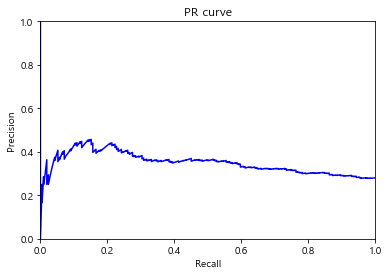

In [290]:
plot_precision_recall_curve(precisions, recalls)

In [291]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [292]:
fpr, tpr, _ = roc_curve(y_test, lgbm.predict_proba(x_test)[:,1])
auc(fpr, tpr)

0.5956488212308413

In [293]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

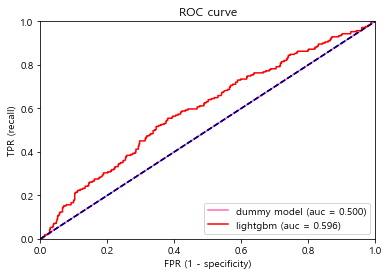

In [294]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, 
                                    dummy.predict_proba(x_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, 
                                  lgbm.predict_proba(x_test)[:,1])
plot_roc_curve(fpr_lgbm, tpr_lgbm, 'lightgbm', 'red')

In [295]:
best_model = lgbm
best_model.score(x_test, y_test)

0.6424802110817942

In [296]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(xxx, yy).score(x_test, y_test)

0    547
1    211
Name: gender, dtype: int64


0.7216358839050132

In [297]:
testc.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,...,1,0,0,0,0,0,0,0,0,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,...,0,0,0,0,0,0,0,0,0,0
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,...,0,0,0,0,0,0,0,0,0,0
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,...,0,0,0,0,0,0,0,0,0,0


In [298]:
testcc = testc.copy()
testcc.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,주구매코너_15,주구매코너_16,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,...,1,0,0,0,0,0,0,0,0,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,...,0,0,0,0,0,0,0,0,0,0
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,...,0,0,0,0,0,0,0,0,0,0
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
testcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 54 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  내점당평균구매수   5000 non-null   float64
 17  하루평균구매액    5000 non-null   float64
 18  수입상품구매액    5000 non-null   float64
 19  주말방문사용액    5000 non-null   float64
 20  평일방문사용액 

In [300]:
testcc.isnull().sum()

custid       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
내점당평균구매수     0
하루평균구매액      0
수입상품구매액      0
주말방문사용액      0
평일방문사용액      0
봄_구매비율       0
여름_구매비율      0
가을_구매비율      0
겨울_구매비율      0
아침_구매비율      0
점심_구매비율      0
저녁_구매비율      0
브랜드구매비율      0
주구매코너_0      0
주구매코너_1      0
주구매코너_2      0
주구매코너_3      0
주구매코너_4      0
주구매코너_5      0
주구매코너_6      0
주구매코너_7      0
주구매코너_8      0
주구매코너_9      0
주구매코너_10     0
주구매코너_11     0
주구매코너_12     0
주구매코너_13     0
주구매코너_14     0
주구매코너_15     0
주구매코너_16     0
주구매코너_17     0
주구매코너_18     0
주구매코너_19     0
주구매코너_20     0
주구매코너_21     0
주구매코너_22     0
주구매코너_23     0
주구매코너_24     0
dtype: int64

In [301]:
testcc.shape

(5000, 54)

In [302]:
testcc['pred'] = lgbm.predict(testcc.loc[:, '총구매액':'주구매코너_24'])

In [303]:
print(best_model.predict_proba(testcc.loc[:, '총구매액':'주구매코너_24']))
testcc['pred_prob'] = best_model.predict_proba(testcc.loc[:, '총구매액':'주구매코너_24'])[:,1]
testcc.head()

[[0.93352887 0.06647113]
 [0.82635818 0.17364182]
 [0.81182089 0.18817911]
 ...
 [0.89705003 0.10294997]
 [0.92826341 0.07173659]
 [0.87511623 0.12488377]]


,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24,pred,pred_prob
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,...,0,0,0,0,0,0,0,0,0,0.066471
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,...,0,0,0,0,0,0,0,0,0,0.173642
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,...,0,0,0,0,0,0,0,0,0,0.188179
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,...,0,0,0,0,0,0,0,0,0,0.084925
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,...,0,0,0,0,0,0,0,0,0,0.097777


In [304]:
target = testcc.query('pred == 1 & pred_prob > 0.7')
target.sort_values(by="pred_prob", ascending=False).to_csv("department_pred.csv", index=False)
pd.read_csv("department_pred.csv")

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,주구매코너_17,주구매코너_18,주구매코너_19,주구매코너_20,주구매코너_21,주구매코너_22,주구매코너_23,주구매코너_24,pred,pred_prob
